## Fitting Ne lines in a loop
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- Remove the # in the line below. Run only once for each computer!
![image.png](attachment:5a0e0d97-4380-4cb2-bf26-d0ab6ee7458a.png)

In [2]:
!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/v.0.23.zip"

     - 56.1 MB 15.0 MB/s 0:00:04
  Preparing metadata (setup.py) ... done
  Created wheel for DiadFit: filename=DiadFit-0.0.23-py3-none-any.whl size=52154 sha256=1690584fefad4c11ebb4475563b8d739d4149f5188f6360cd68a37f9895aa8cc
  Stored in directory: /private/var/folders/5m/qgr9jhb91jv3z3bz7_tkt1s00000gn/T/pip-ephem-wheel-cache-mxck6p5t/wheels/24/62/cd/876d5437c9dd53ca72d687b24760a4b70c9eb14b30d364e4b3
Successfully built DiadFit
  Attempting uninstall: DiadFit
    Found existing installation: DiadFit 0.0.11
    Uninstalling DiadFit-0.0.11:
      Successfully uninstalled DiadFit-0.0.11


### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.23'

## Extracting metadata

In [43]:
 # Path to metadata files for Ne. Easier to have in subfolder
meta_path=r'/Users/kyledayton/Downloads/09.14.22 LM0 MI 2/Text Files'
spectra_path=r'/Users/kyledayton/Downloads/09.14.22 LM0 MI 2/Spectra'

# Find files


# Put the common string you can in all your Ne lines here
ID_str='NE '
file_ext_meta='txt' # Will only take files of this type 
exclude_str='png' # Will exclude files of this type, sometimes images have same name
 # Leave as none unless witec appended a number
Ne_files_meta=pf.get_Ne_files(path=meta_path, file_ext=file_ext_meta, ID_str=ID_str, 
                         exclude_str=exclude_str, sort=True)

Ne_files_meta


['NE 1.txt',
 'NE 10.txt',
 'NE 11.txt',
 'NE 12.txt',
 'NE 13.txt',
 'NE 14.txt',
 'NE 15.txt',
 'NE 16.txt',
 'NE 17.txt',
 'NE 18.txt',
 'NE 19.txt',
 'NE 2.txt',
 'NE 20.txt',
 'NE 21.txt',
 'NE 22.txt',
 'NE 23.txt',
 'NE 24.txt',
 'NE 25.txt',
 'NE 26.txt',
 'NE 27.txt',
 'NE 29.txt',
 'NE 3.txt',
 'NE 30.txt',
 'NE 31.txt',
 'NE 32.txt',
 'NE 33.txt',
 'NE 34.txt',
 'NE 35.txt',
 'NE 37.txt',
 'NE 4.txt',
 'NE 5.txt',
 'NE 6.txt',
 'NE 7.txt',
 'NE 8.txt',
 'NE 9.txt']

In [44]:
## Image file says Video Image

In [45]:
# Extract useful metadata from each file
meta=pf.stitch_metadata_in_loop(path=meta_path, Allfiles=Ne_files_meta, prefix=False, trupower=True)
meta.head()

100%|██████████████████████████████████████████| 35/35 [00:00<00:00, 968.05it/s]


Done


filename                  date  power (mW)  Int_time (s)  accumulations  \
0   NE 1.txt  September 14, 2022\n       5.034          45.0            3.0   
11  NE 2.txt  September 14, 2022\n       5.040          45.0            3.0   
21  NE 3.txt  September 14, 2022\n       5.044          45.0            3.0   
29  NE 4.txt  September 14, 2022\n       5.058          45.0            3.0   
30  NE 5.txt  September 14, 2022\n       5.087          45.0            3.0   

    Mag (X)             duration     24hr_time  sec since midnight  \
0      50.0  ['0h', '2m', '17s']  2:14:32 PM\n             51272.0   
11     50.0  ['0h', '2m', '17s']  2:20:52 PM\n             51652.0   
21     50.0  ['0h', '2m', '16s']  2:27:57 PM\n             52077.0   
29     50.0  ['0h', '2m', '17s']  2:35:11 PM\n             52511.0   
30     50.0  ['0h', '2m', '17s']  2:49:08 PM\n             53348.0   

    Spectral Center  index  
0          1324.929      0  
11         1324.929     11  
21         1324.929     21  
29         1324.929     29  
30         1324.929     30

## Get Ne line positions for your specific laser wavelength
- At the moment, this returns any Ne lines with intensity >2000 in the NIST databook, although you can change this!

In [46]:
wavelength =532.067 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, cut_off_intensity=2000)
df_Ne.head()

Raman_shift (cm-1)  Intensity  Ne emission line in air
1           817.957694     5000.0                556.27662
9          1116.345158     5000.0                565.66588
16         1309.738376     5000.0                571.92248
19         1398.173304     5000.0                574.82985
23         1446.822793     7000.0                576.44188

## Calculate the ideal distance between the two lines you are selecting
- This finds the closest line in the table above for the line shift you have written down

In [47]:
line_1=1117
line_2=1447
ideal_split=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=line_1, line2_shift=line_2,
                                     cut_off_intensity=2000)
ideal_split

Ne_Split       Line_1       Line_2  Entered Pos Line 1  \
0  330.477634  1116.345158  1446.822793                1117   

   Entered Pos Line 2  
0                1447

## Find your Ne spectra files

In [48]:
filetype='headless_txt'
# Put the common string you can in all your Ne lines here
ID_str='NE '
file_ext='txt' # Will only take files of this type 
exclude_str='png' # Will exclude files of this type, sometimes images have same name
prefix=None # Leave as none unless witec appended a number
Ne_files=pf.get_Ne_files(path=spectra_path, file_ext=file_ext, ID_str=ID_str, exclude_str=exclude_str, sort=True)

In [49]:
Ne_files

['01 NE 1.txt',
 '03 NE 2.txt',
 '05 NE 3.txt',
 '07 NE 4.txt',
 '11 NE 5.txt',
 '17 NE 6.txt',
 '19 NE 7.txt',
 '21 NE 8.txt',
 '23 NE 9.txt',
 '27 NE 10.txt',
 '29 NE 11.txt',
 '31 NE 12.txt',
 '33 NE 13.txt',
 '35 NE 14.txt',
 '37 NE 15.txt',
 '39 NE 16.txt',
 '41 NE 17.txt',
 '43 NE 18.txt',
 '45 NE 19.txt',
 '47 NE 20.txt',
 '49 NE 21.txt',
 '51 NE 22.txt',
 '54 NE 23.txt',
 '56 NE 24.txt',
 '58 NE 25.txt',
 '60 NE 26.txt',
 '62 NE 27.txt',
 '64 NE 28.txt',
 '66 NE 29.txt',
 '68 NE 30.txt',
 '70 NE 31.txt',
 '75 NE 32.txt',
 '79 NE 33.txt',
 '81 NE 34.txt',
 '84 NE 35.txt',
 '87 NE 36.txt',
 '89 NE 37.txt']

## Select the first file you want to fit
- You can either do this numerically, or by specifiying the filename between ''

In [50]:
filename=Ne_files[0]  # Or you could put a string here, like 'NE1.txt' 

## Plot Ne lines to inspect
- This function allows you to inspect your spectra, and also uses scipy find peaks to get a first guess of the peak positions, which speeds up the voigt fitting in the later part of the notebook

Biggest 6 peaks:


pos        height
50  1448.403059  21474.333980
45  1399.406110   5806.000000
63  1567.514917   4662.333496
9   1118.069988   2603.666748
26  1220.505213   1732.333374
33  1311.278432   1710.000000

selected Peak 1 Pos
1118.069988
selected Peak 2 Pos
1448.403059


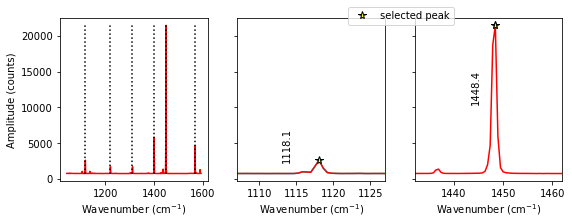

In [51]:
# Specify the approximate peak positions of the lines you are interested in
# If your drift is off the real positions, you'll have to tweak these numbers
peak1_cent=line_1 # approximate position of the 1st line you are interested in
peak2_cent=line_2 # Approximate position of the 2nd line you are interested in


Ne, df_sort_Ne_trim, nearest_pk1, nearest_pk2=pf.plot_Ne_lines(path=spectra_path, filename=filename, filetype=filetype, 
n_peaks=6, peak1_cent=peak1_cent, peak2_cent=peak2_cent,
height=10, threshold=0.6, distance=1, prominence=10, width=1, exclude_range_1=None,
exclude_range_2=None)

## You can tweak parameters here
- The default parameters may work, you can see what those are here:
- Most important things, the number of peaks you want for 1117, and the offset for this peak (LH_offset_min) if you are fitting the 1117 line as you need 2 peaks
- By default, the function applies the fit to all the points inside the outermost background positions. This can be trimmed using x_span_pk1_override, and x_span_pk2_override
- See figure from Penny for what these parameters actually are

In [52]:
pf.Ne_peak_config()

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=1, lower_bck_pk1=(-50, -25), upper_bck1_pk1=(8, 15), upper_bck2_pk1=(30, 50), lower_bck_pk2=(-44.2, -22), upper_bck1_pk2=(15, 50), upper_bck2_pk2=(50, 51), x_range_baseline=20, y_range_baseline=200, pk1_amplitude=100, pk2_amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=(1.5, 3), x_span_pk1=None, x_span_pk2=None)

- You can also overwrite any of these, the most likely things you'll want to overwrite are the background positions, or the amplitude

In [53]:
Ne_Config=pf.Ne_peak_config(pk1_amplitude=40, pk2_amplitude=100, LH_offset_mini=[2, 5], 
lower_bck_pk1=(-60, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40],
x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10], N_poly_pk2_baseline=2 )
Ne_Config

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=2, lower_bck_pk1=(-60, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70], lower_bck_pk2=[-40, -30], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40], x_range_baseline=20, y_range_baseline=200, pk1_amplitude=40, pk2_amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=[2, 5], x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])

filename  pk2_peak_cent  pk2_amplitude  pk2_sigma  pk2_gamma  error_pk2  \
0  01 NE 1.txt    1448.177465    29208.09662   0.238803   0.238803    0.00346   

   pk1_peak_cent  pk1_amplitude  pk1_sigma  pk1_gamma  error_pk1     deltaNe  \
0    1118.007308    2542.189366   0.281062   0.281062        NaN  330.170156   

    Ne_Corr  Ne_Corr_min  Ne_Corr_max  residual_pk2  residual_pk1  \
0  1.000931          NaN          NaN    116.773288     21.187361   

   residual_pk1+pk2  
0        137.960649

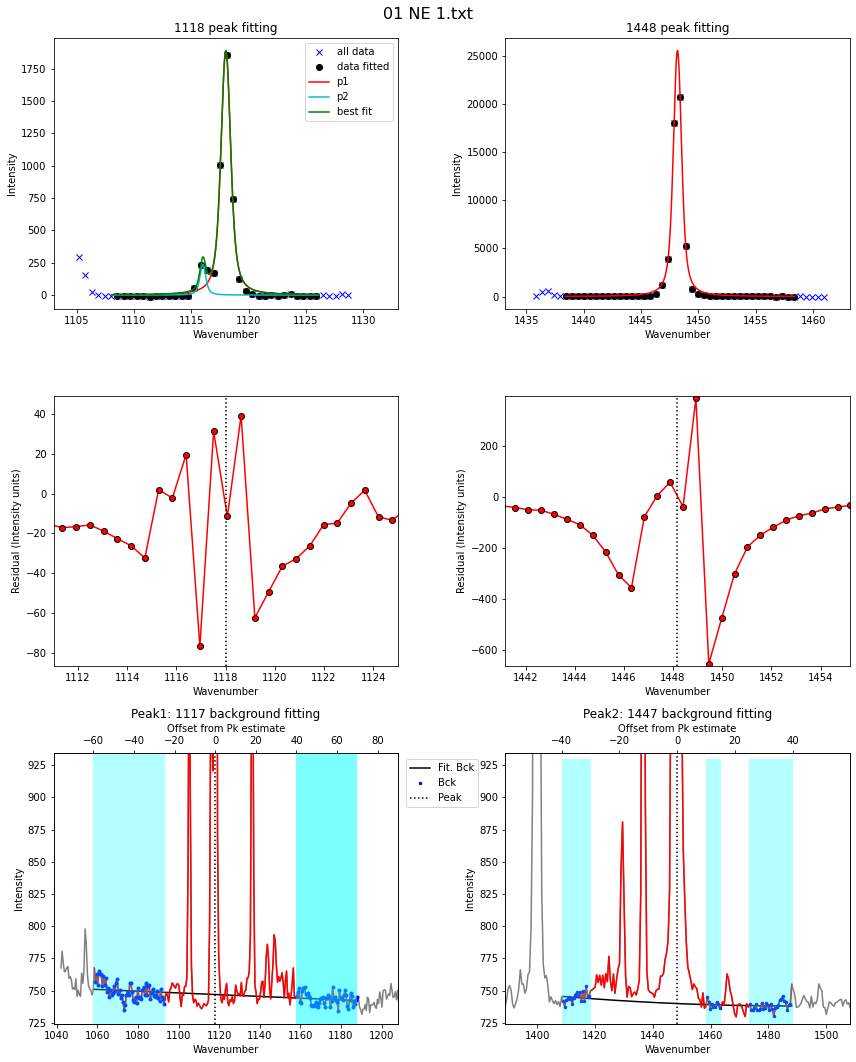

In [54]:
# You also need to set whether you want 1 peak or 2 for the LH diad
peaks_1=2

df_test=pf.fit_Ne_lines(  
    config=Ne_Config, peaks_1=peaks_1,
    Ne=Ne, filename=filename, path=spectra_path, prefix=prefix,
    Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
    DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
display(df_test)

## Now you can loop over all files using these parameters
- Most important thing you can change is plot_figure=False, much quicker, but wont save or show figures, plot_figure=True will)
- If you need, you can add other parameters in the loop here. 

In [55]:
len(Ne_files)

37

 54%|███████████████████████▏                   | 20/37 [00:14<00:11,  1.45it/s]/Users/kyledayton/opt/anaconda3/lib/python3.9/site-packages/DiadFit/ne_lines.py:916: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ((ax3, ax2), (ax5, ax4), (ax1, ax0)) = plt.subplots(3,2, figsize = (12,15)) # adjust dimensions of figure here
100%|███████████████████████████████████████████| 37/37 [00:26<00:00,  1.40it/s]


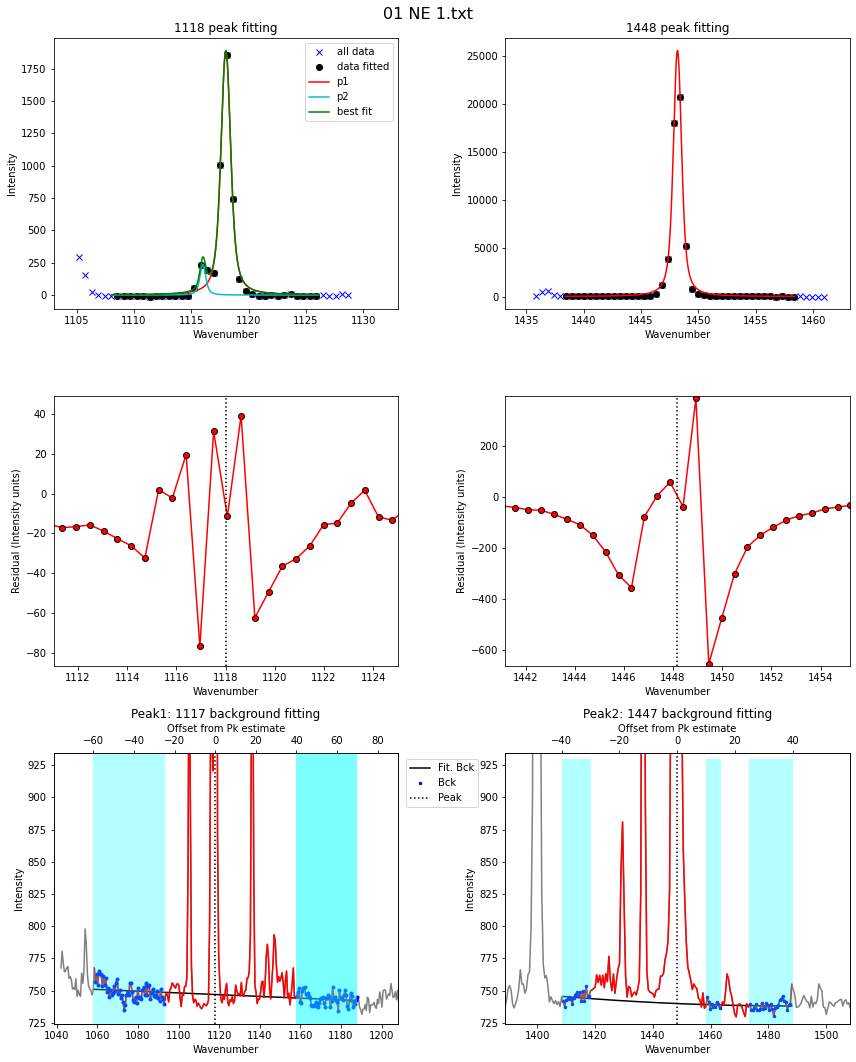

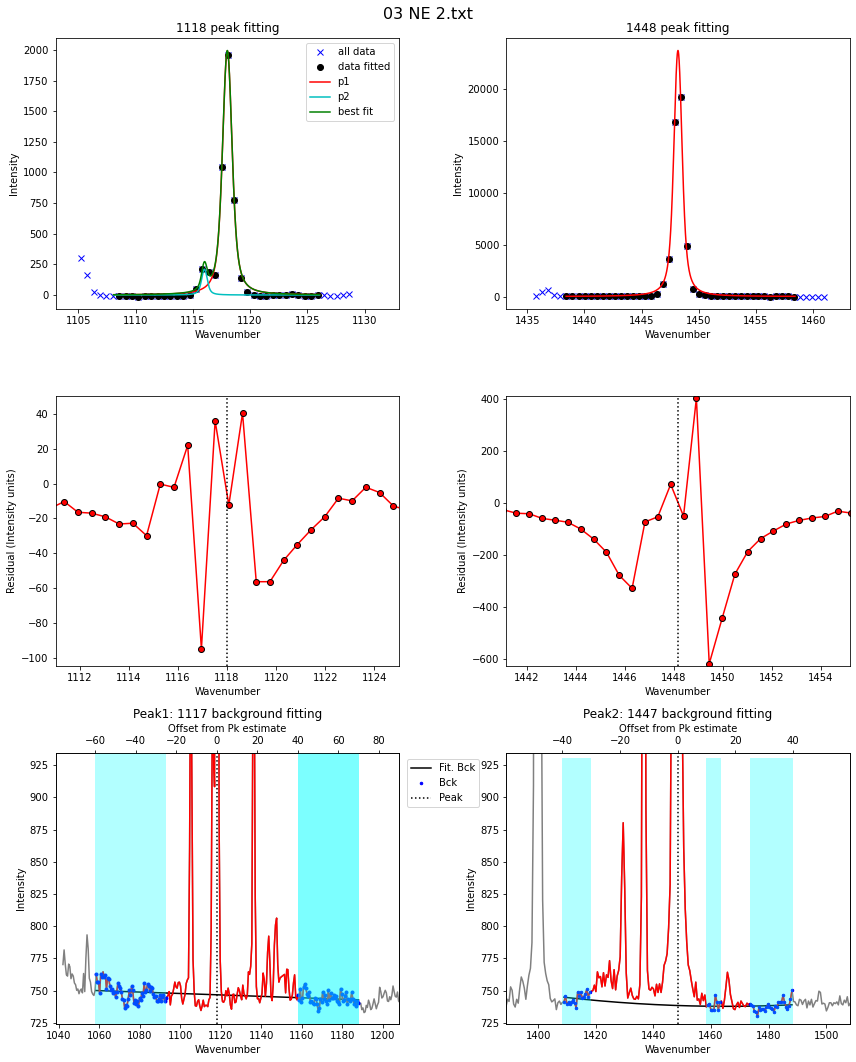

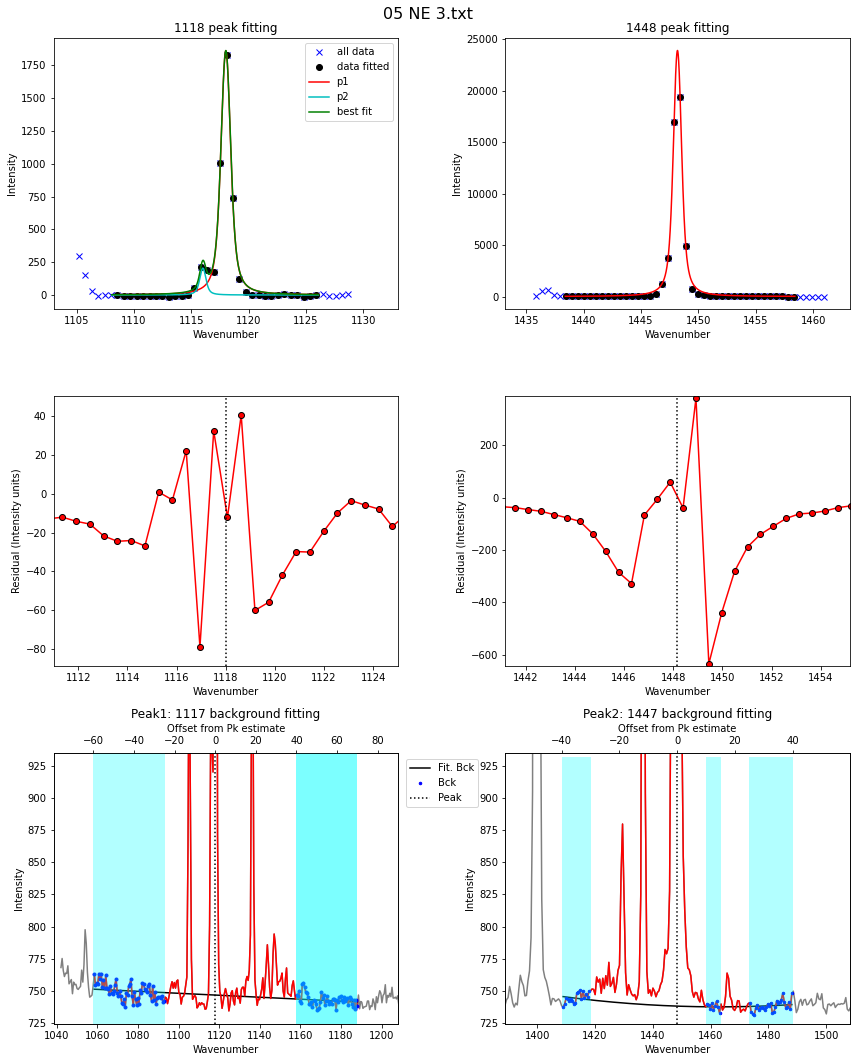

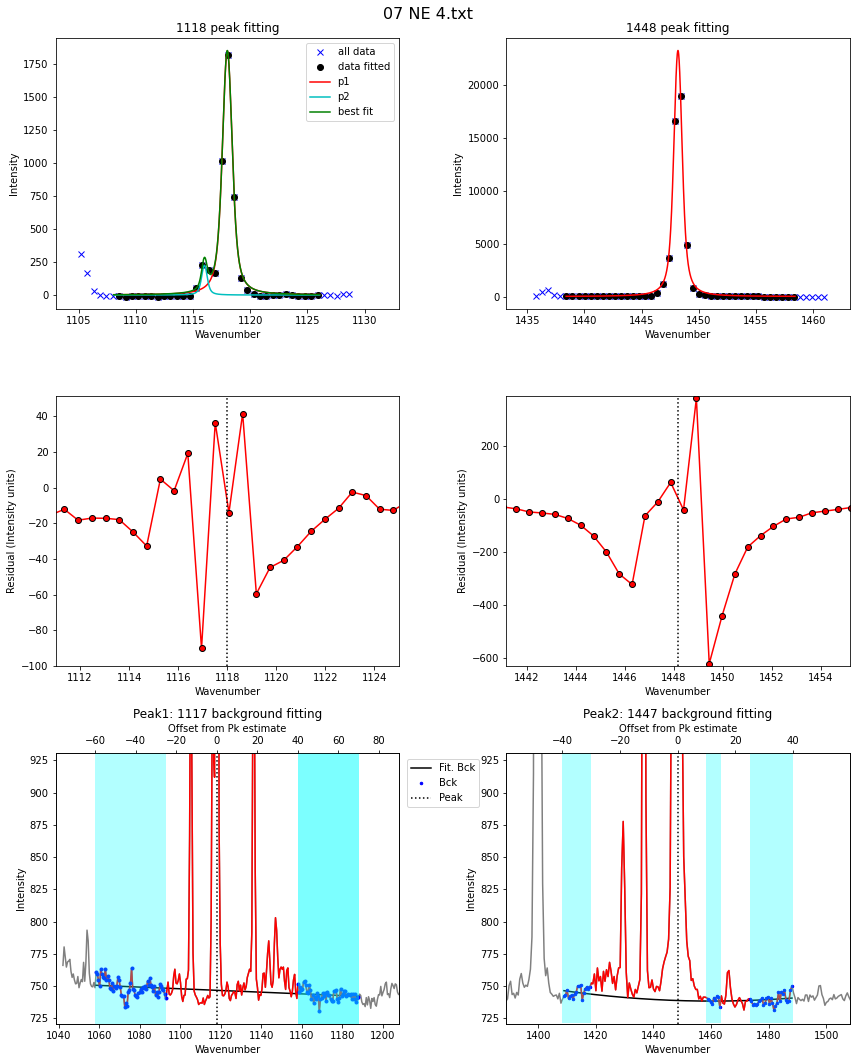

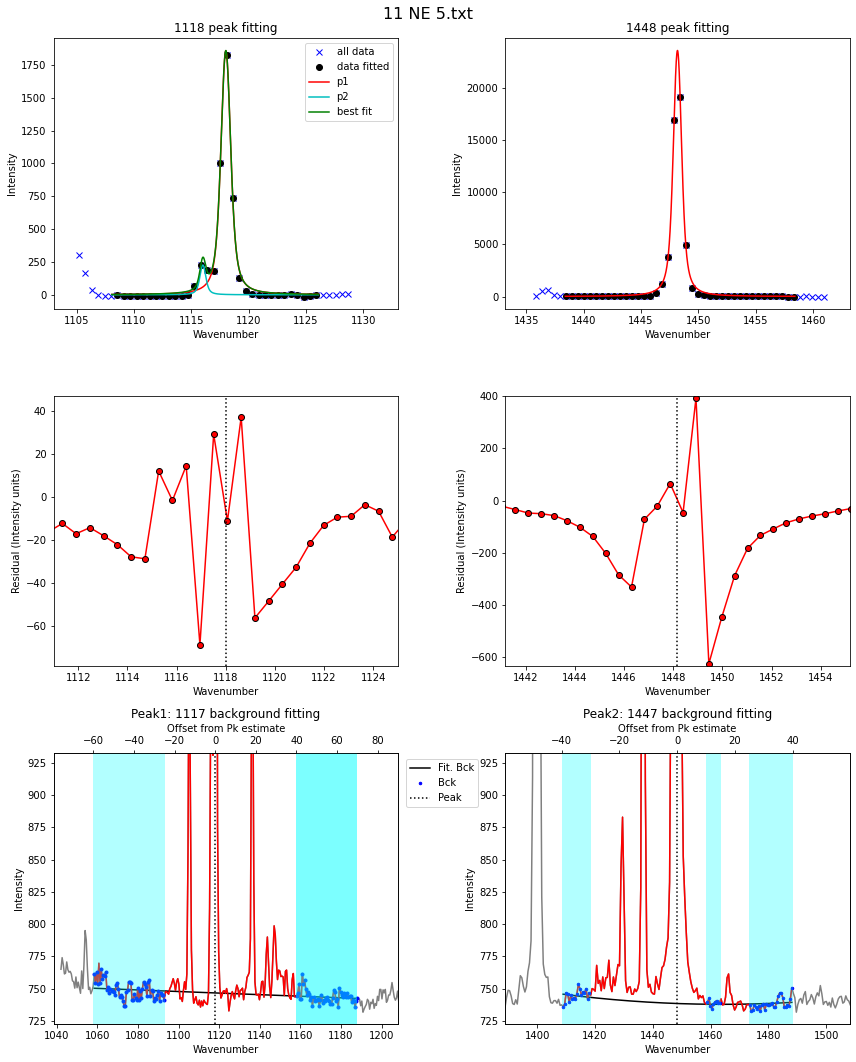

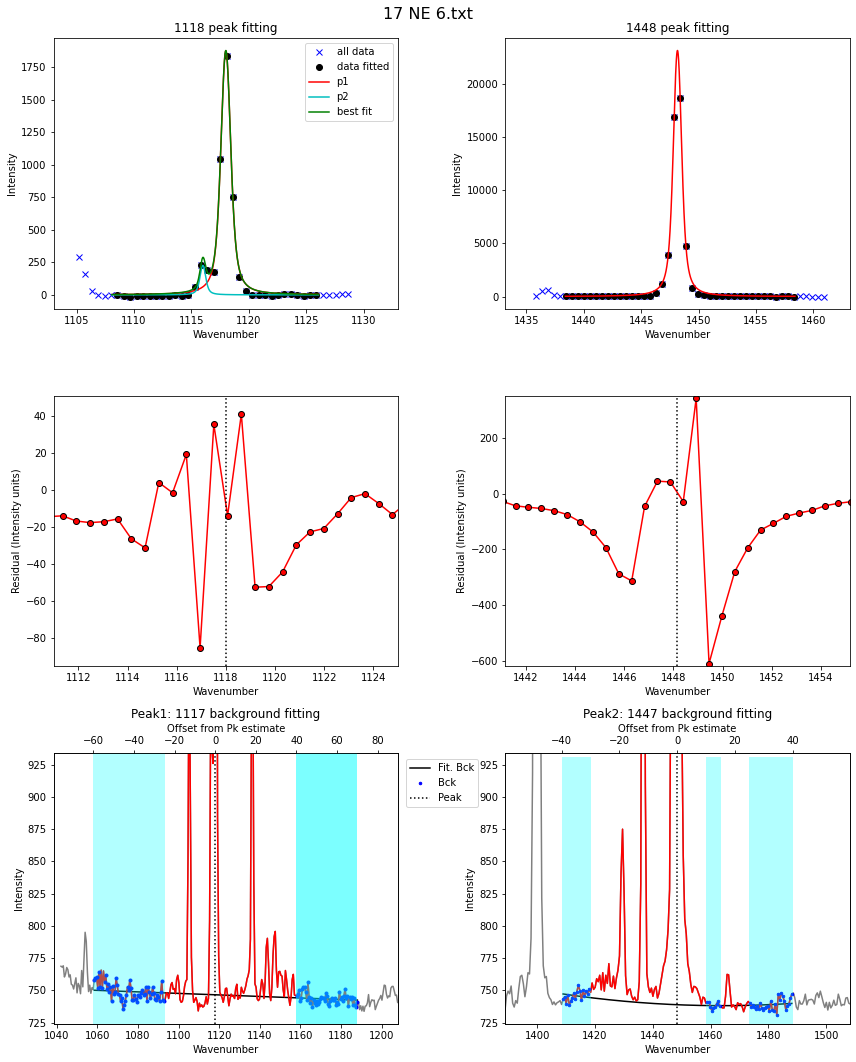

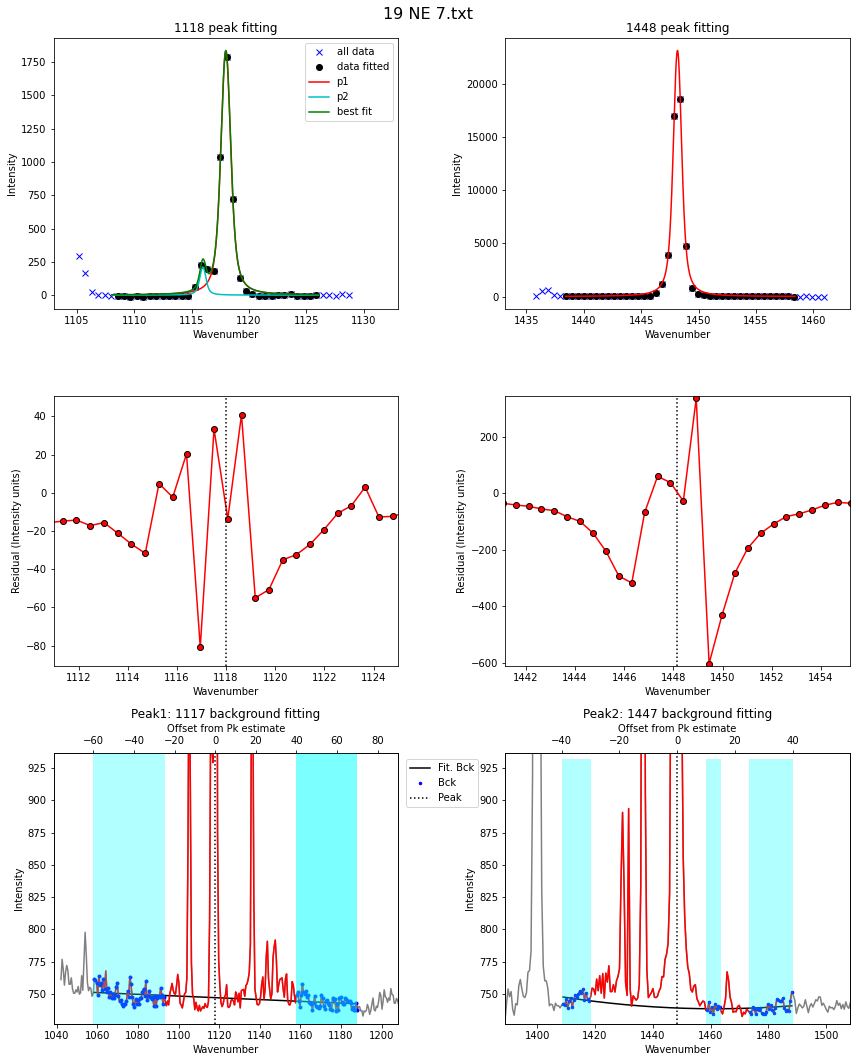

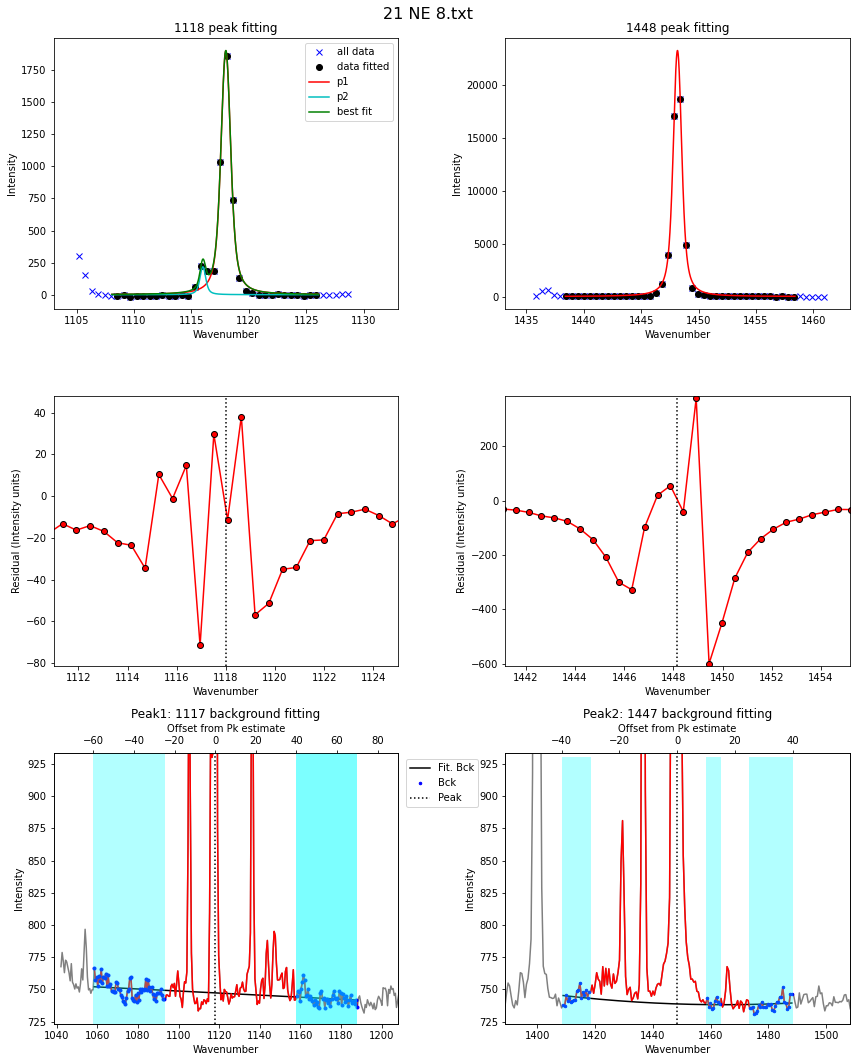

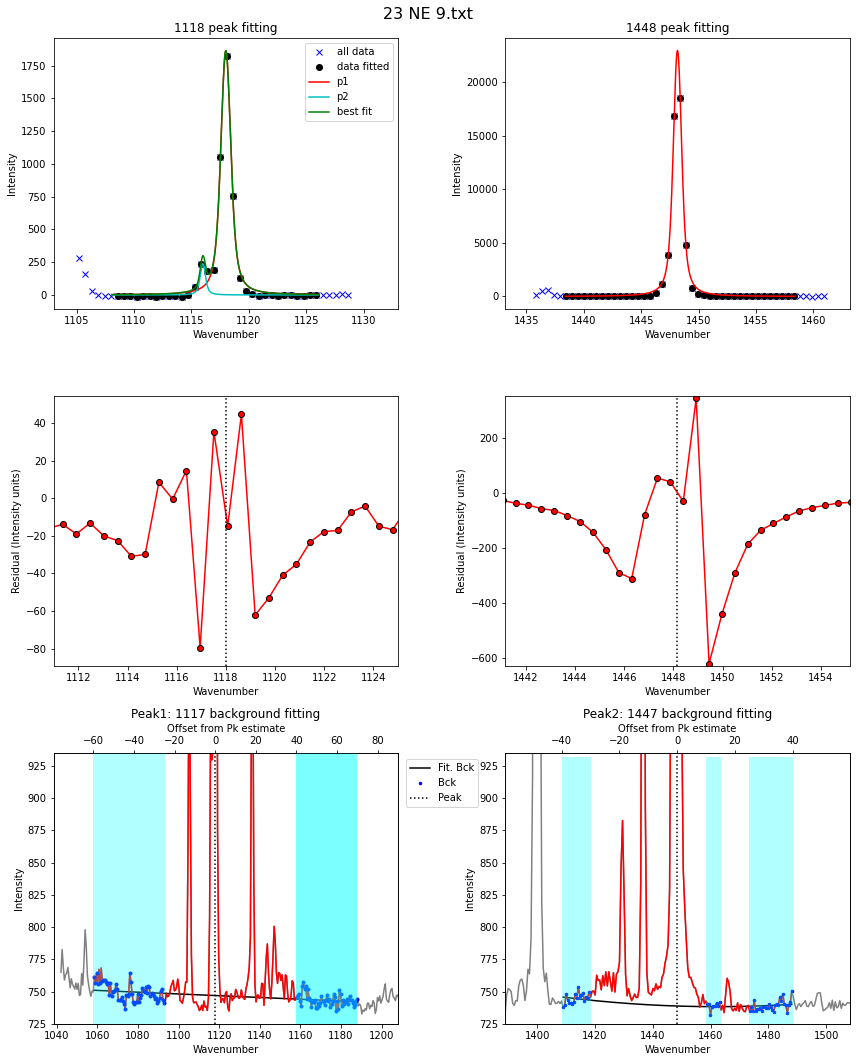

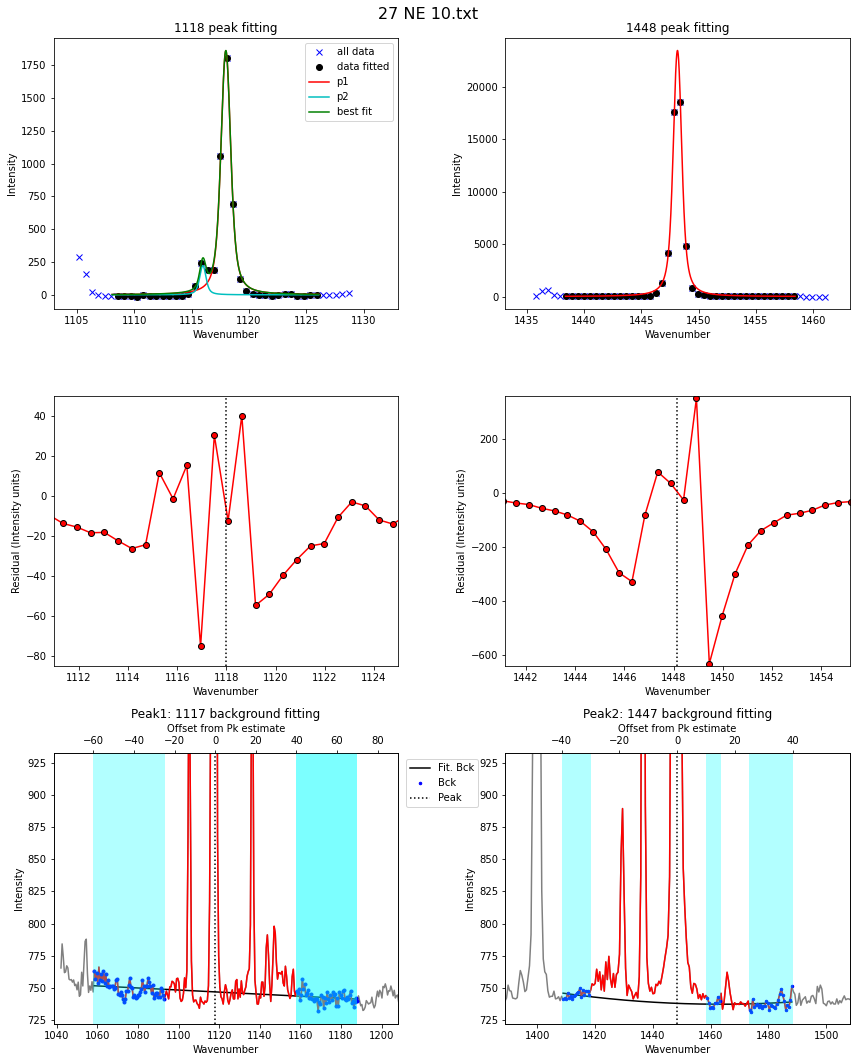

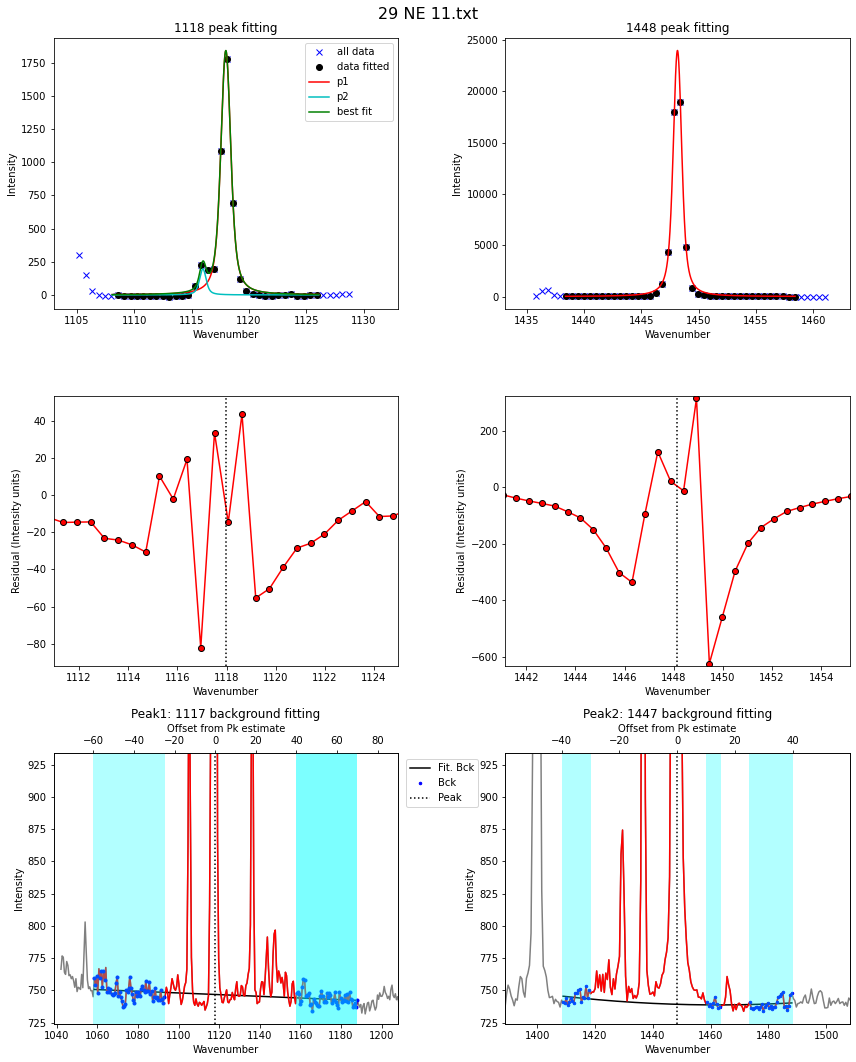

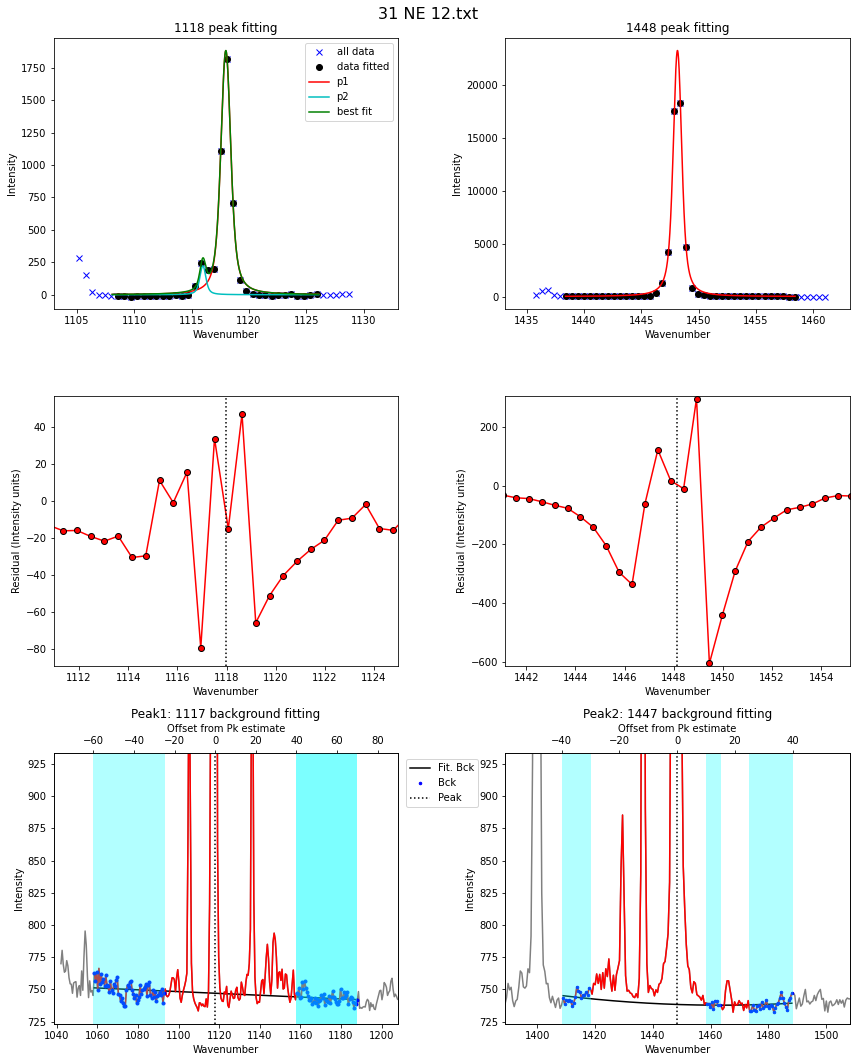

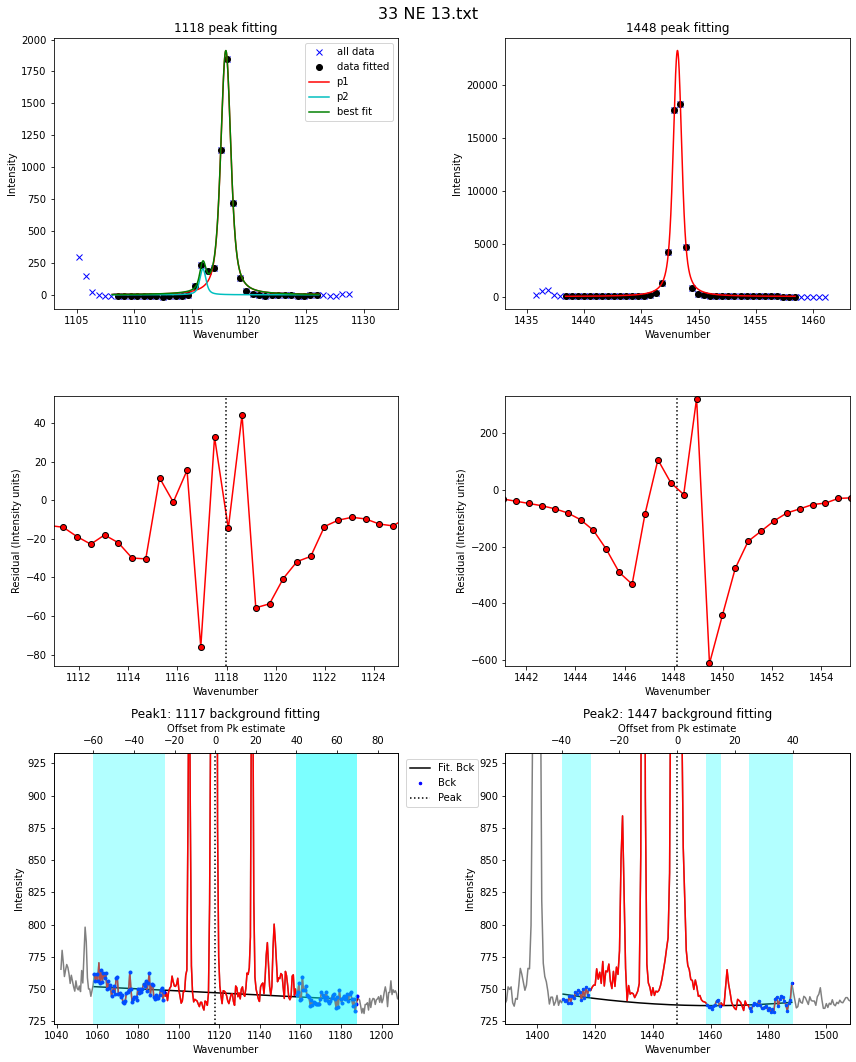

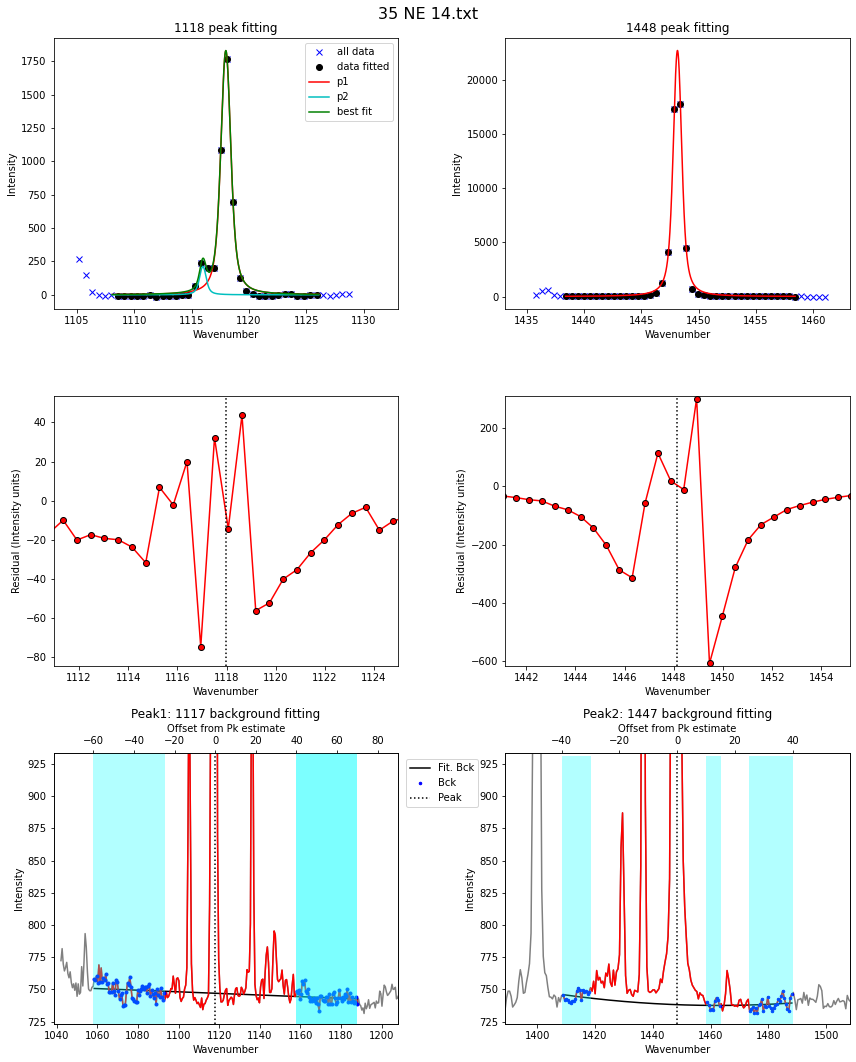

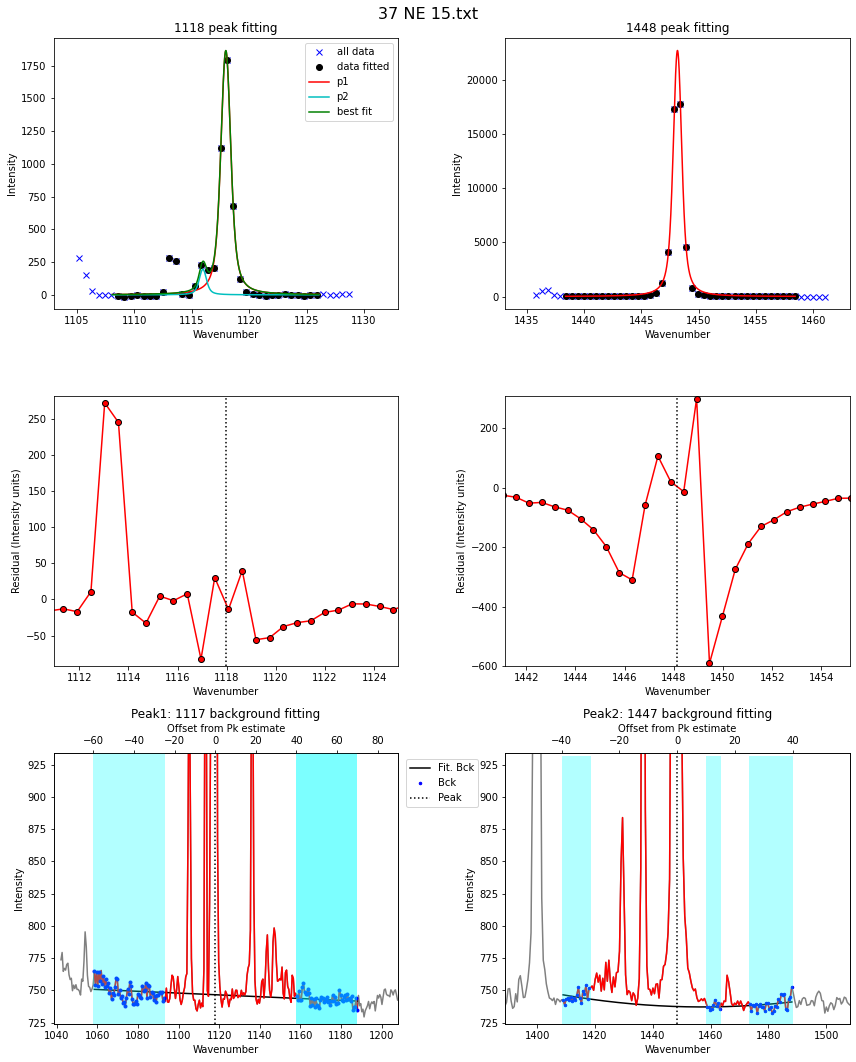

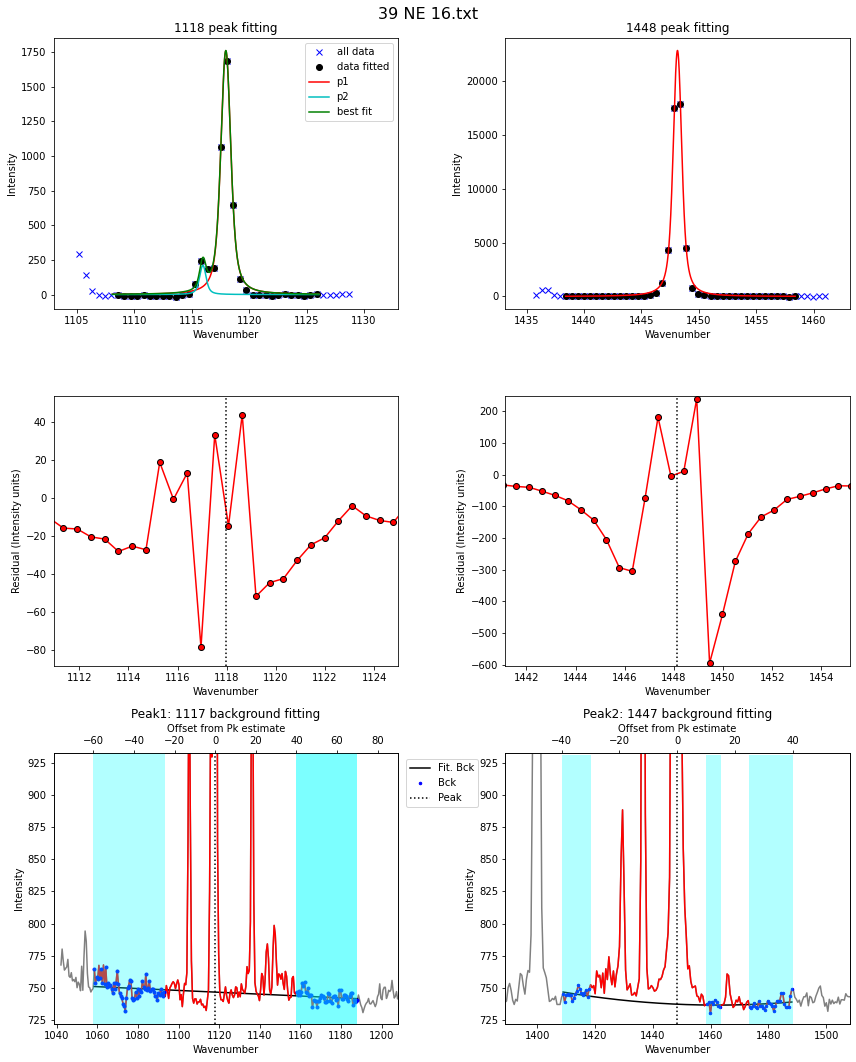

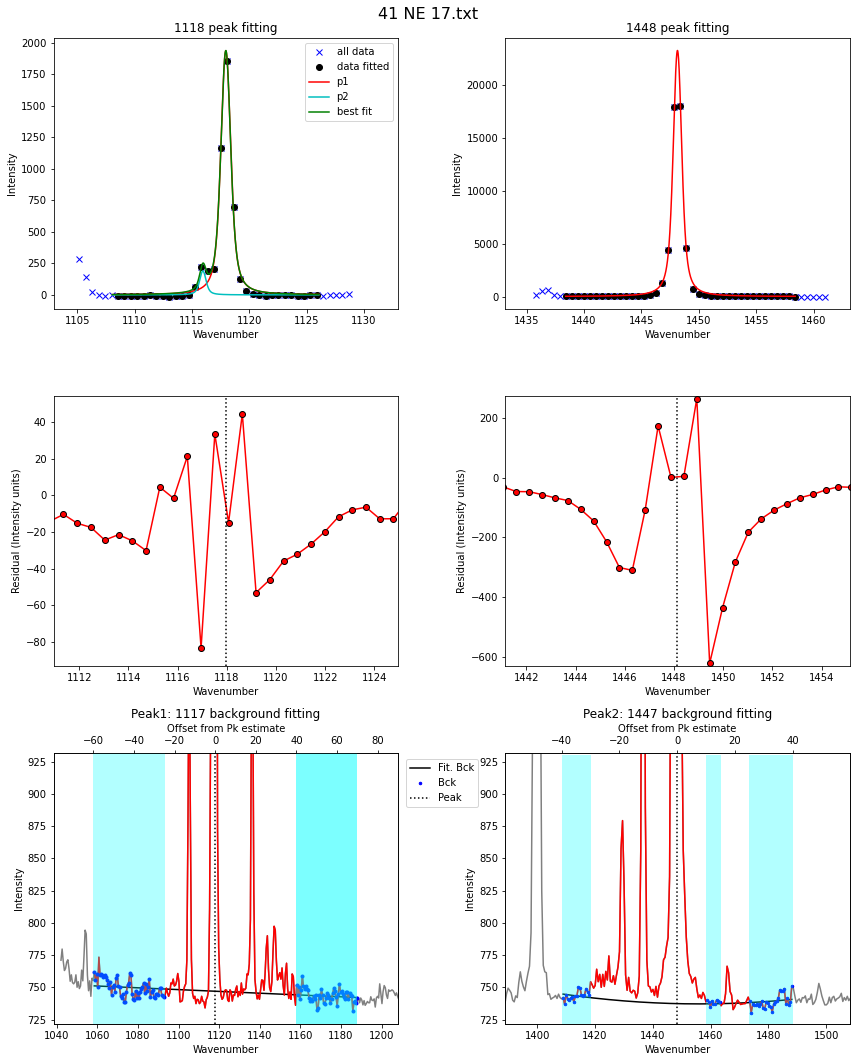

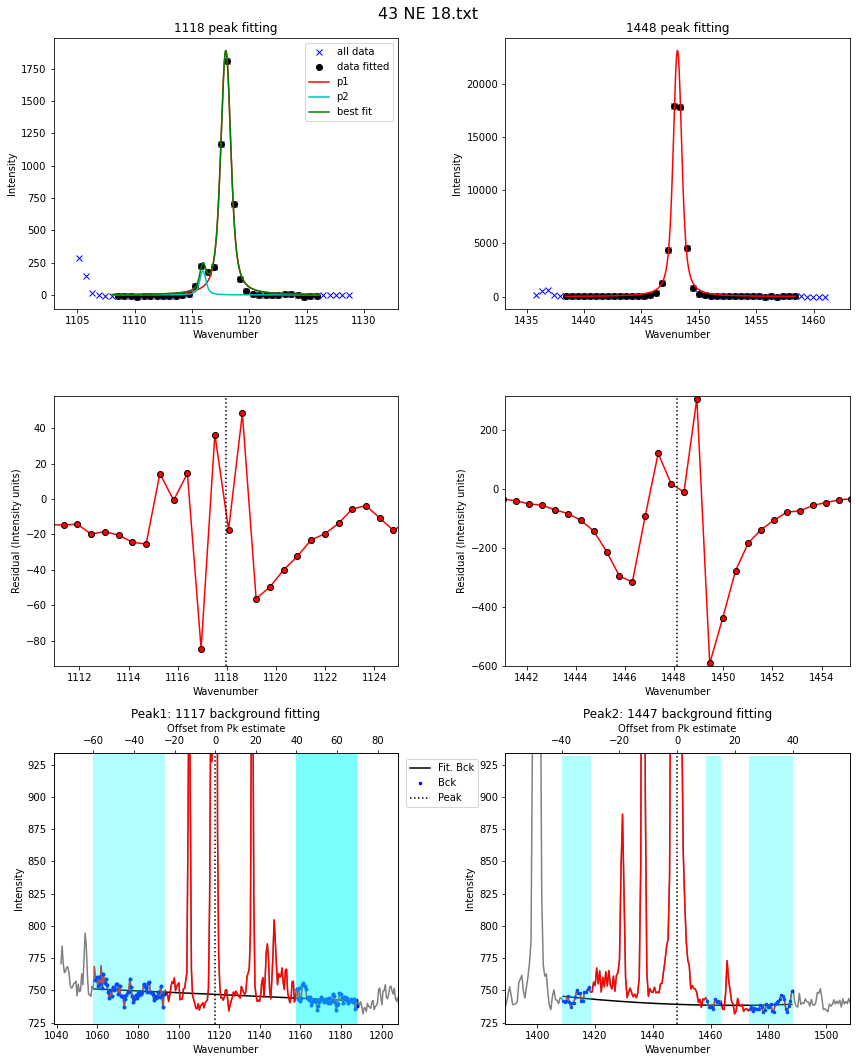

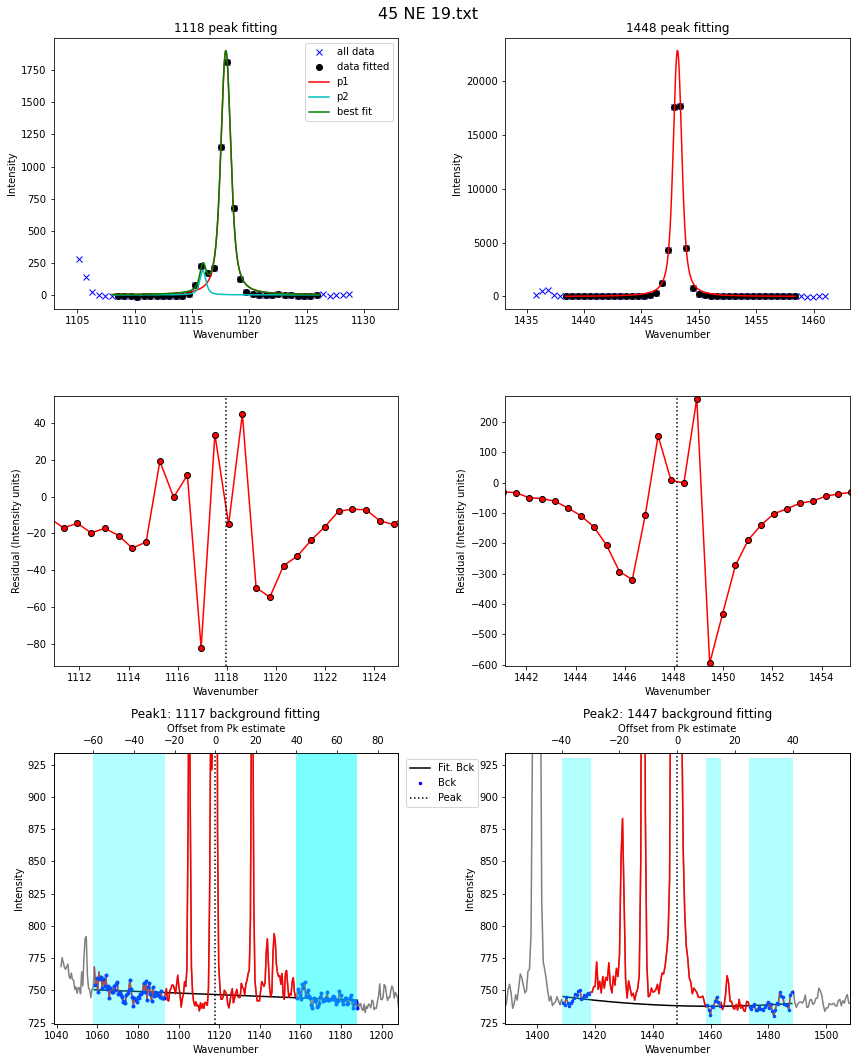

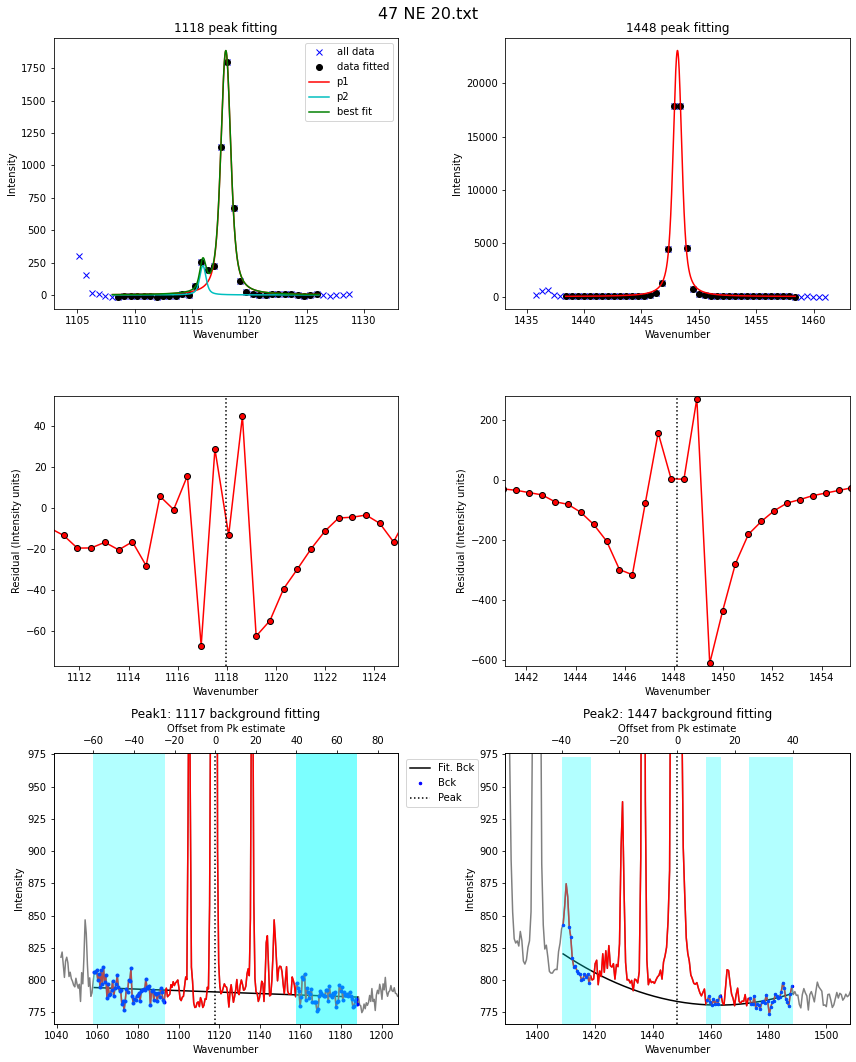

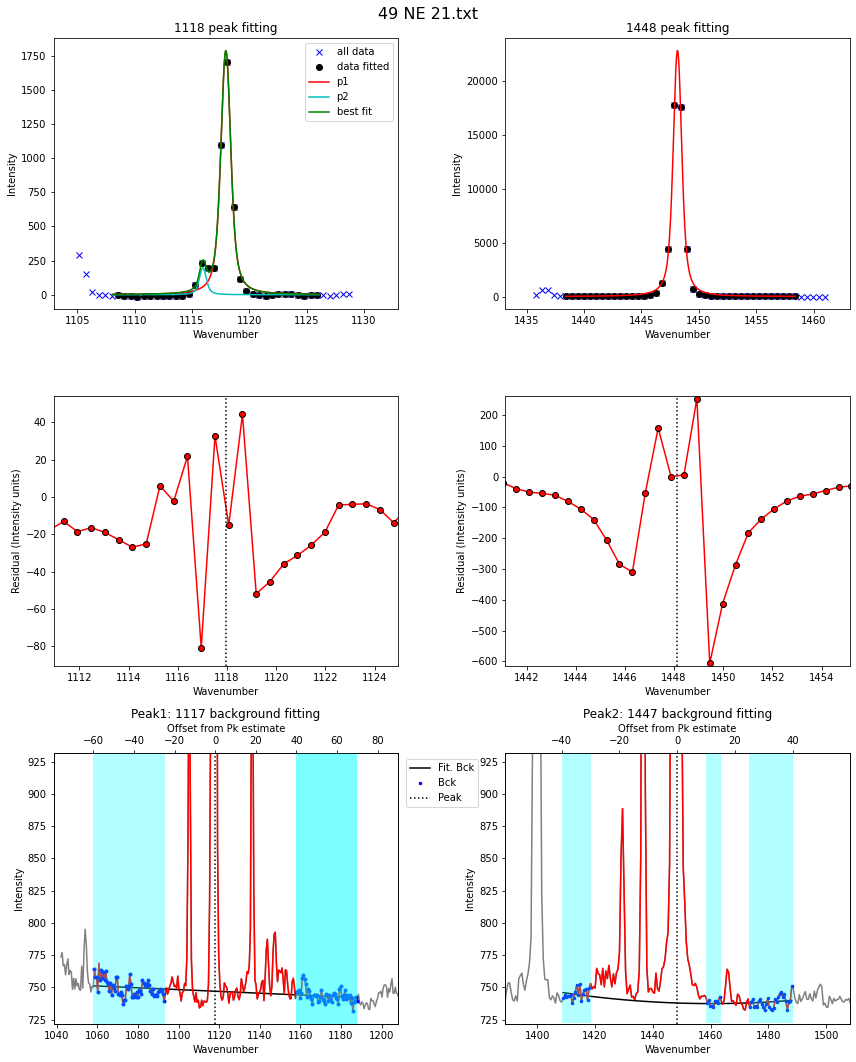

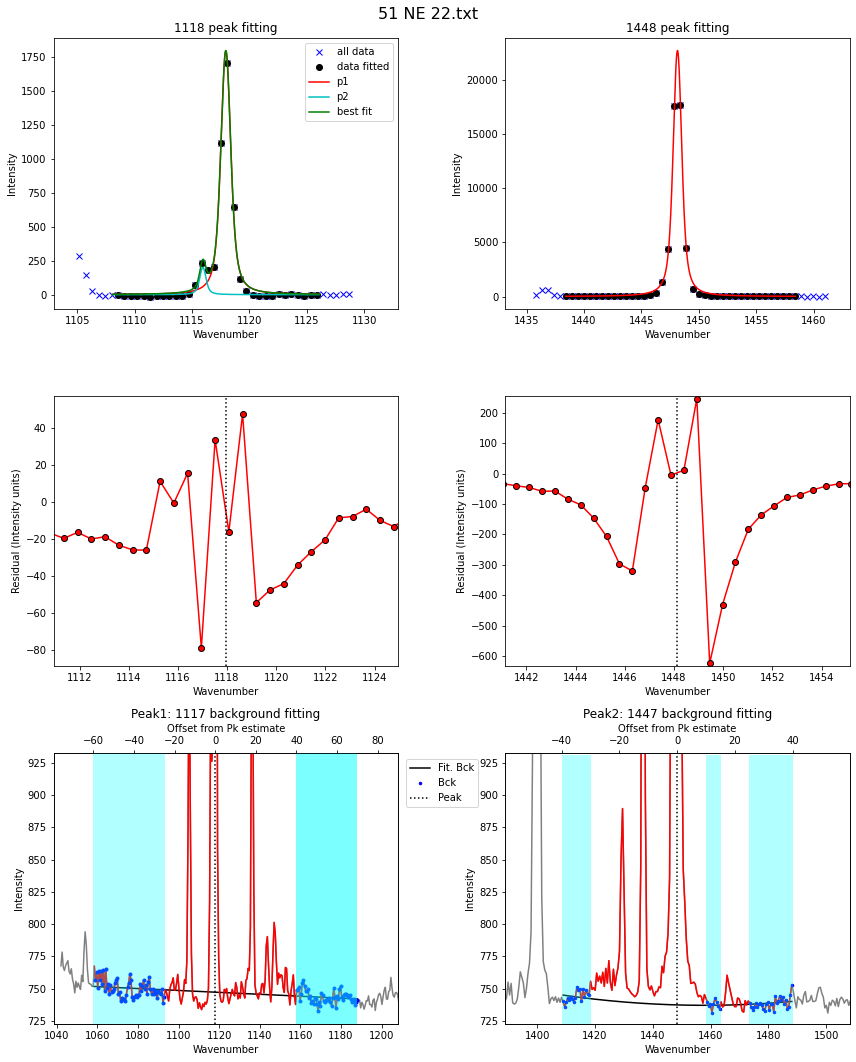

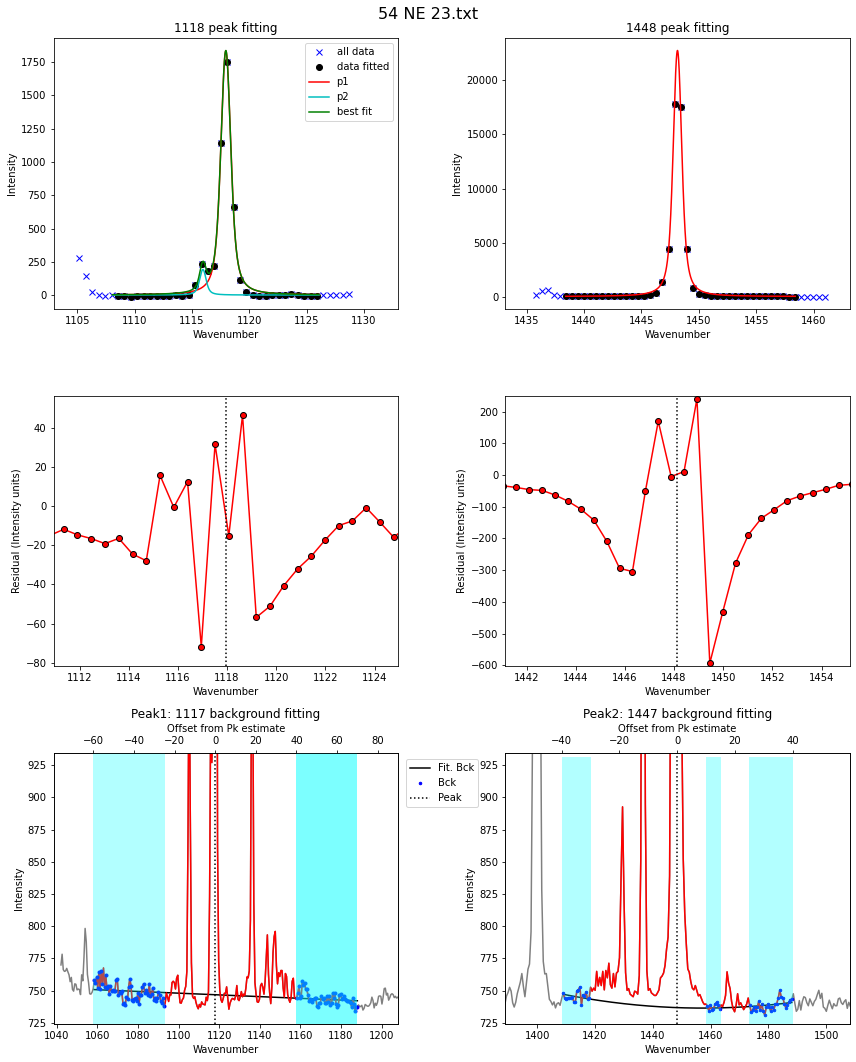

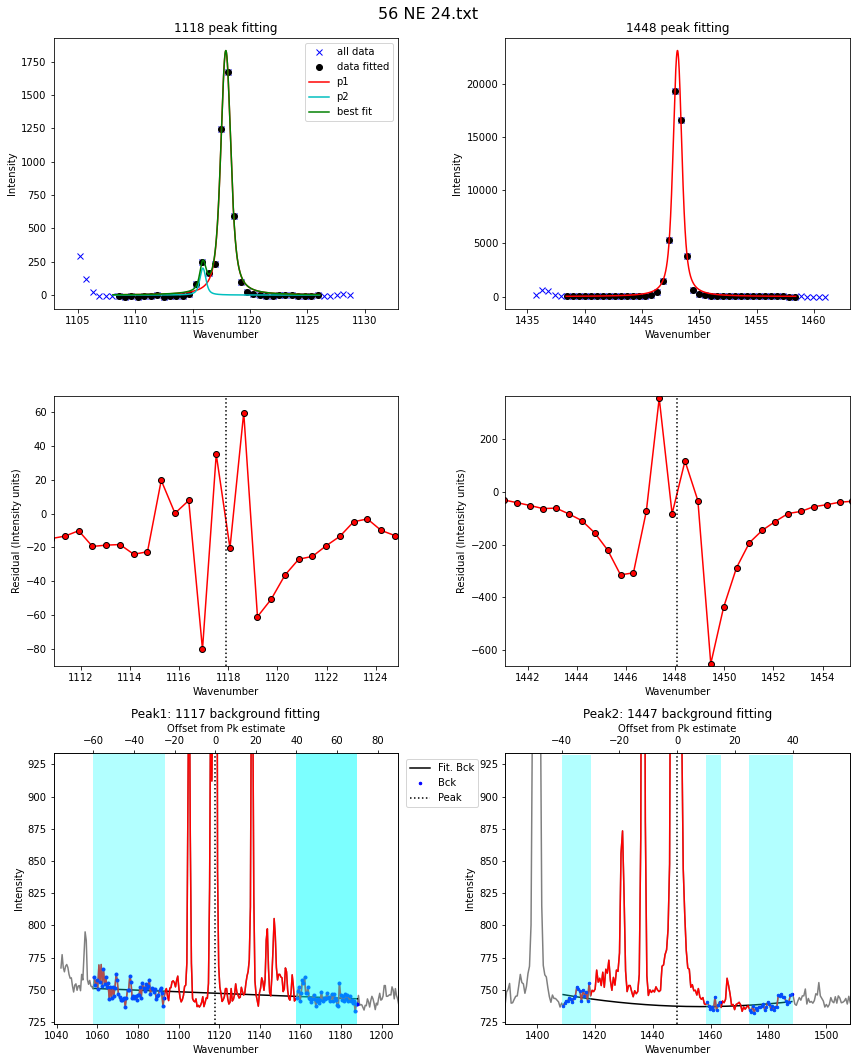

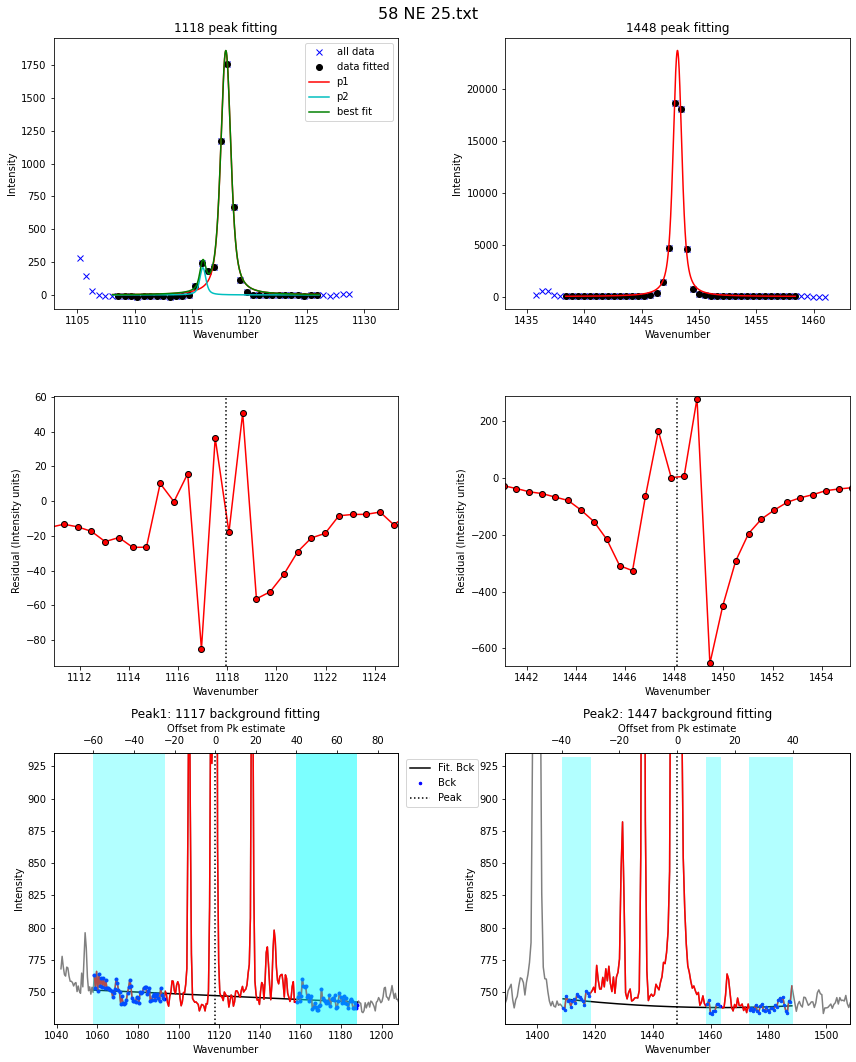

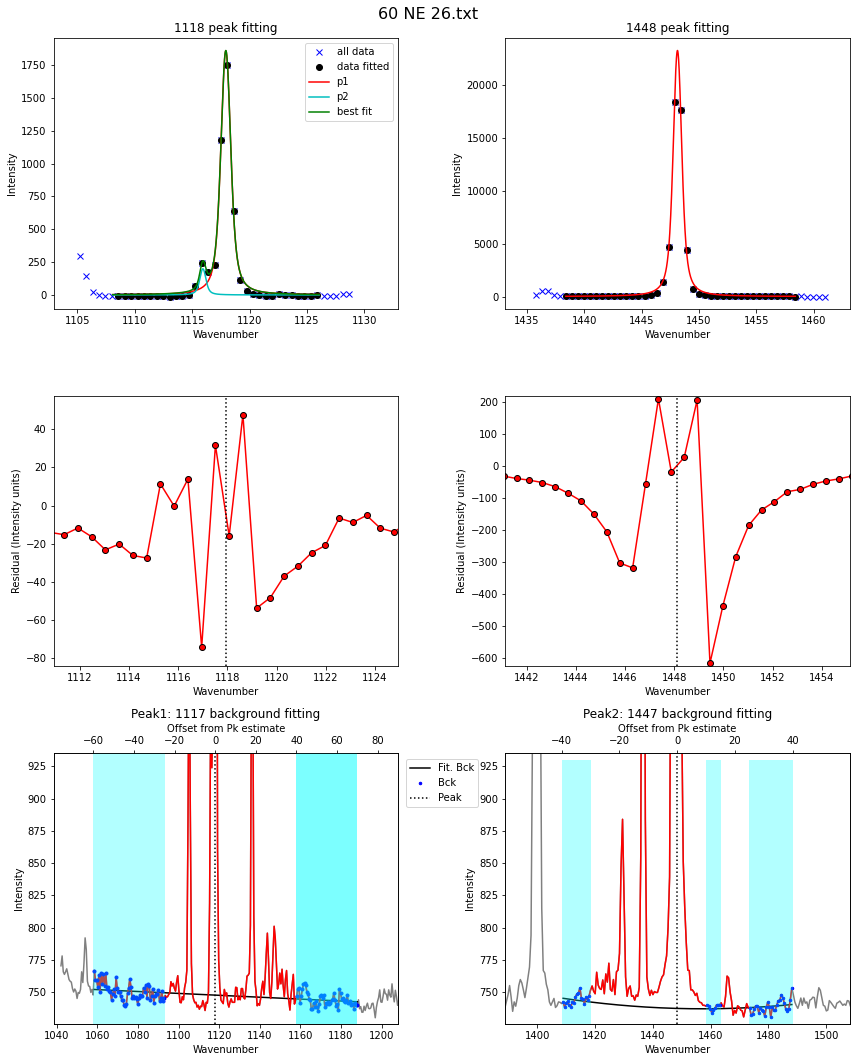

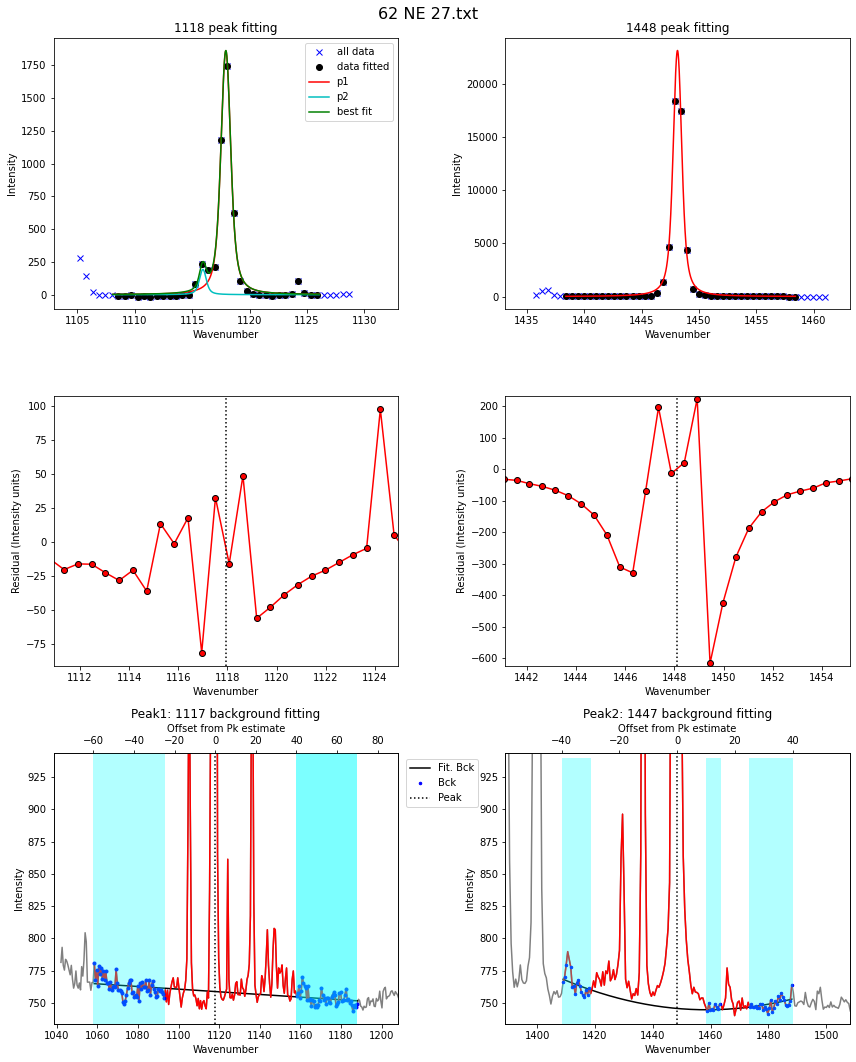

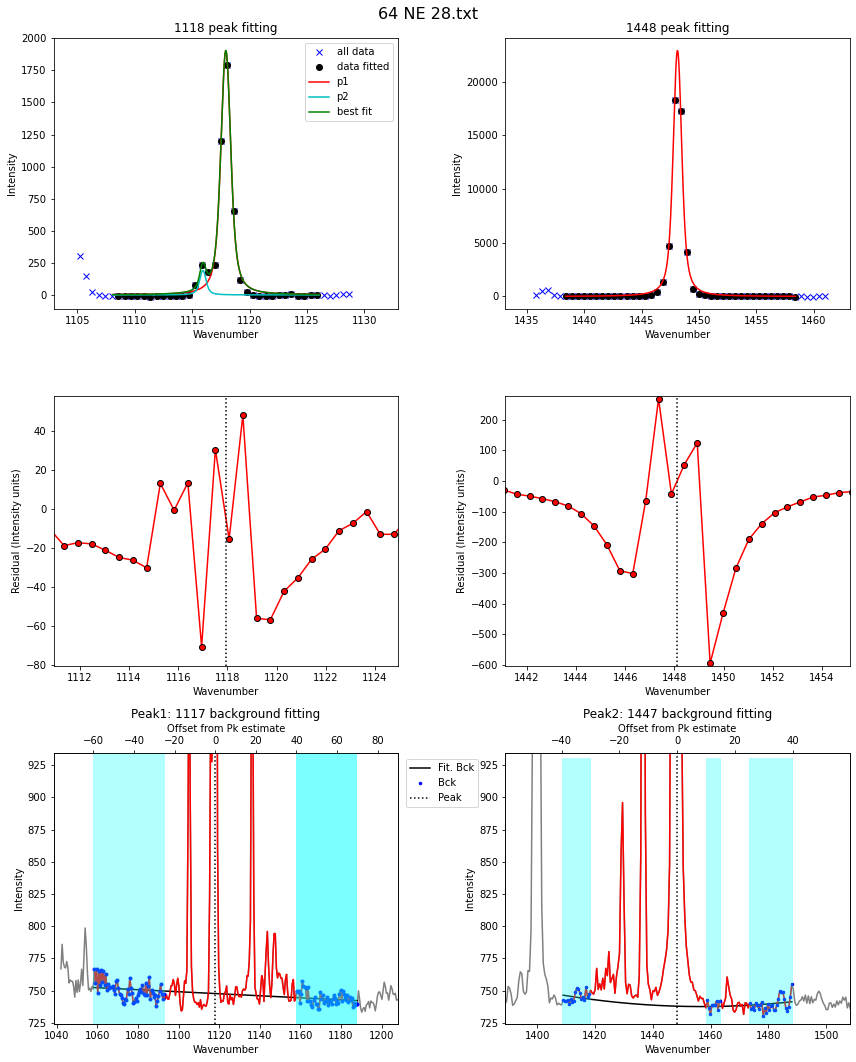

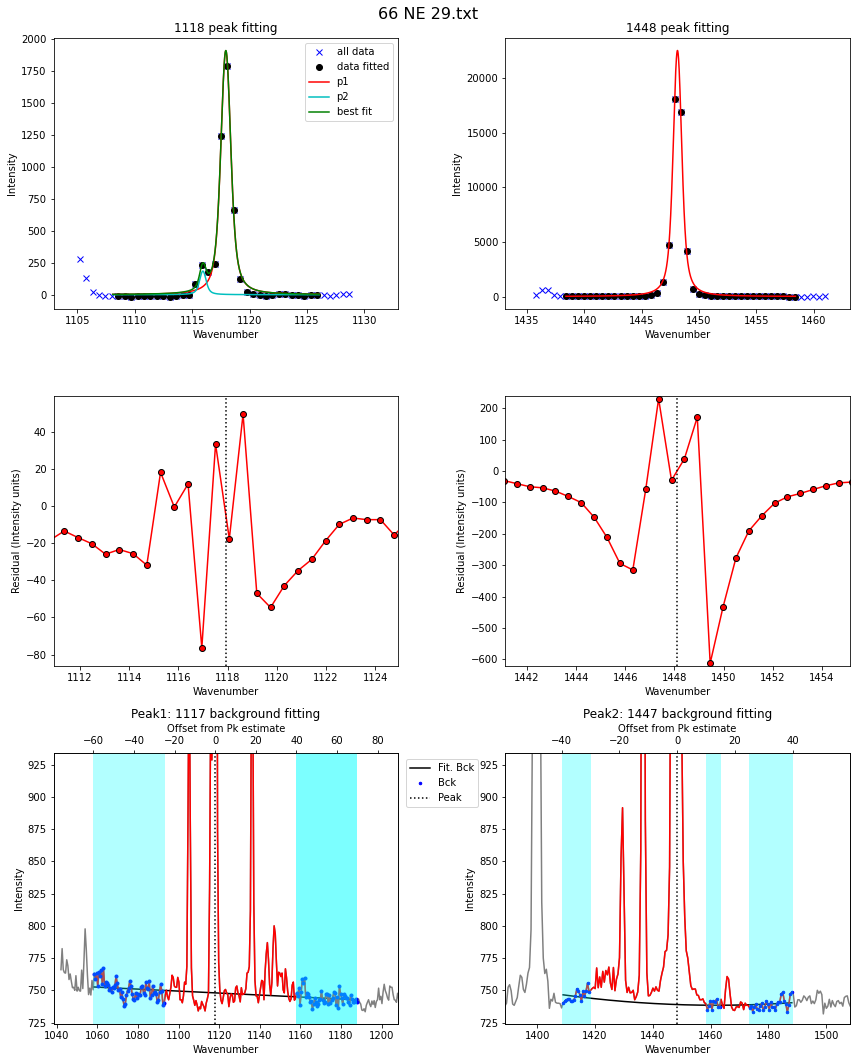

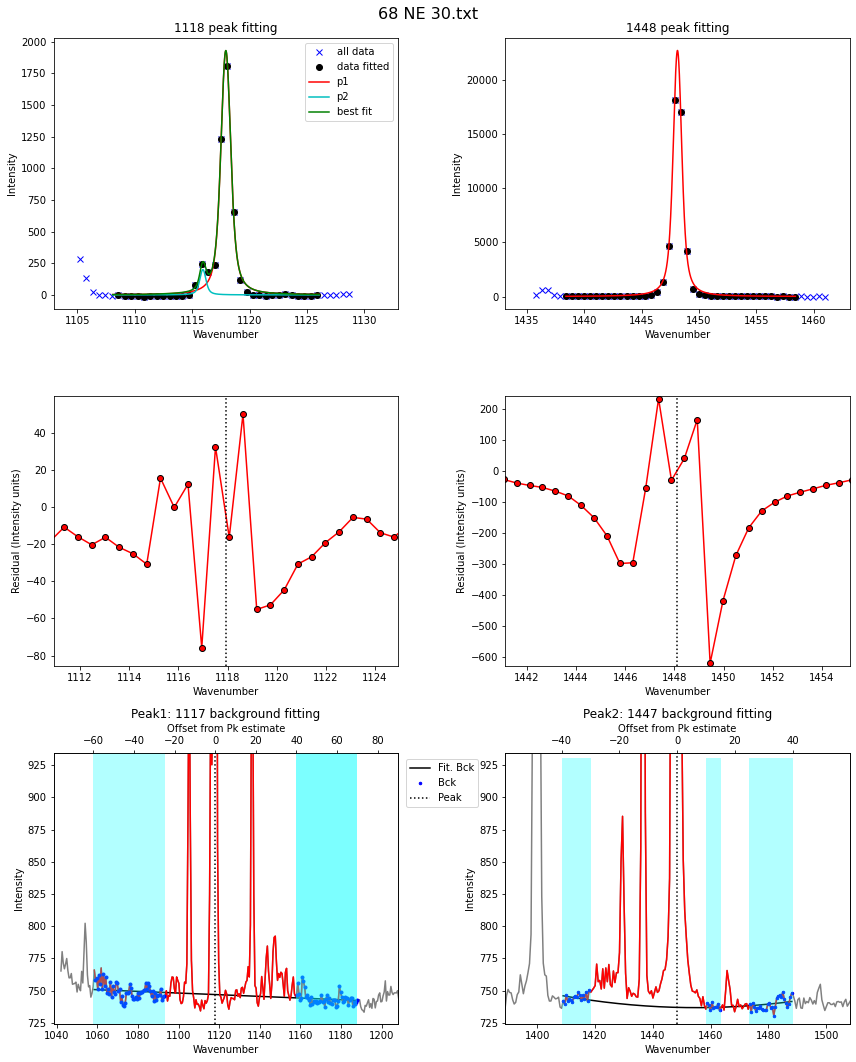

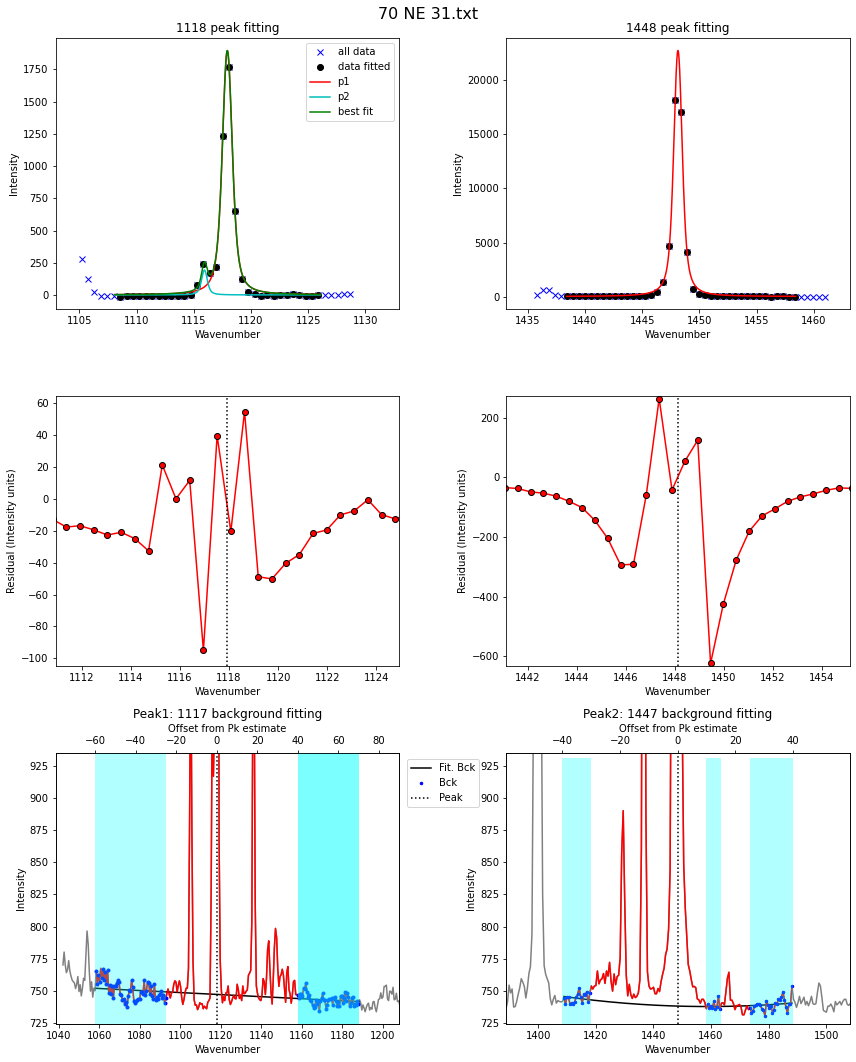

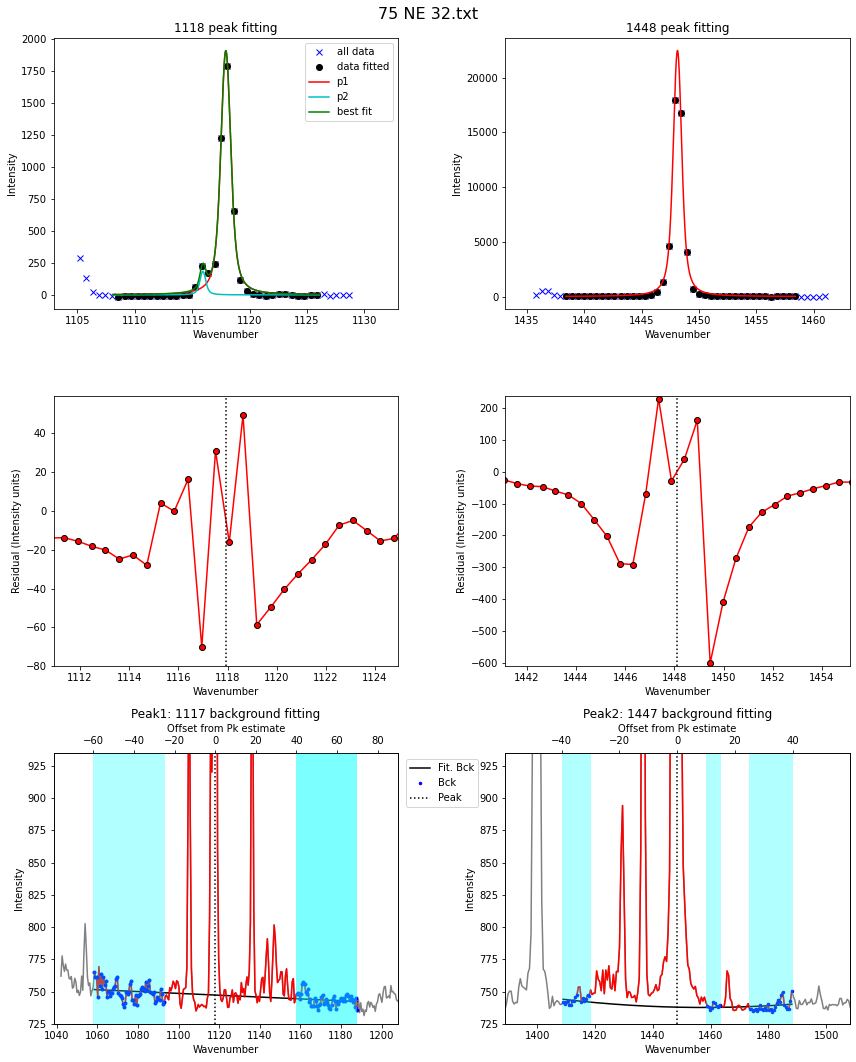

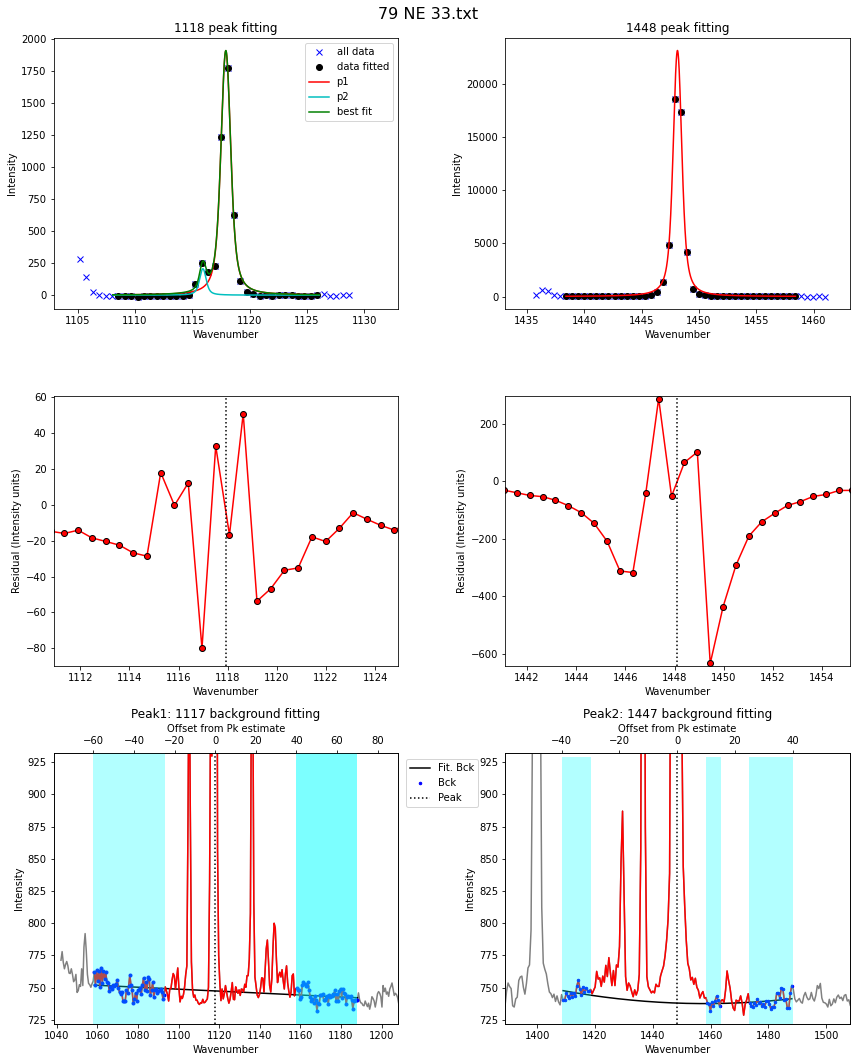

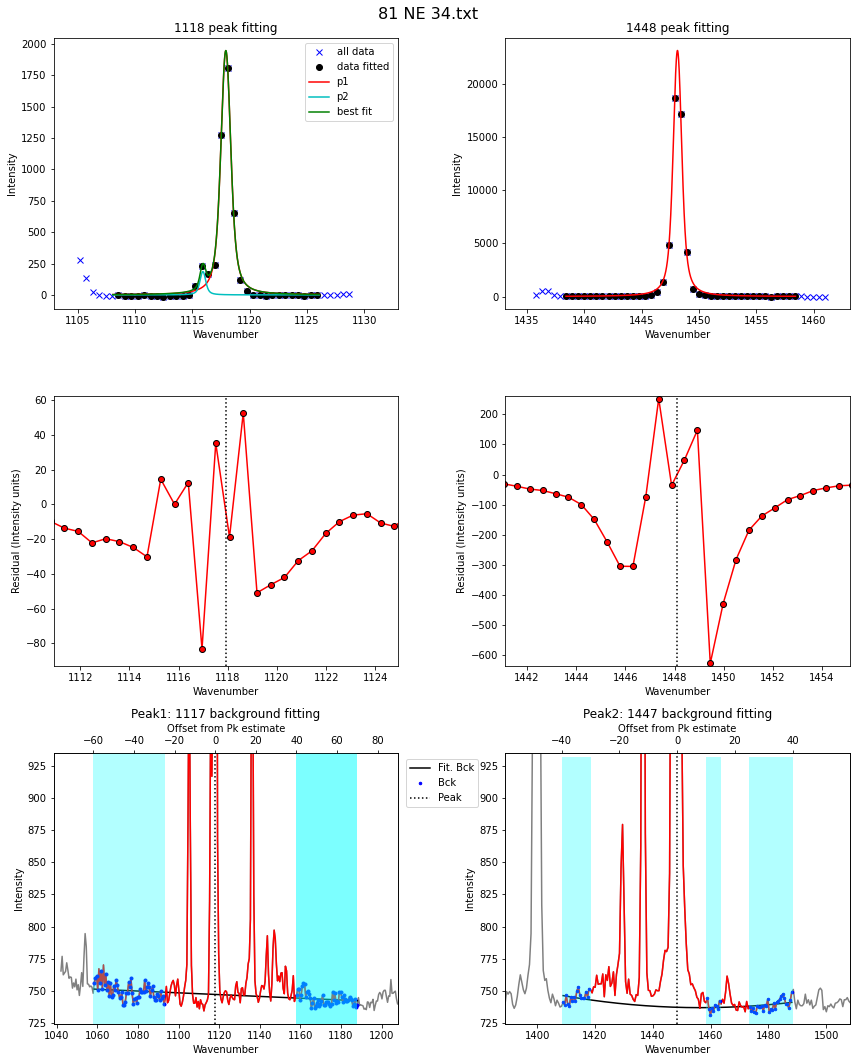

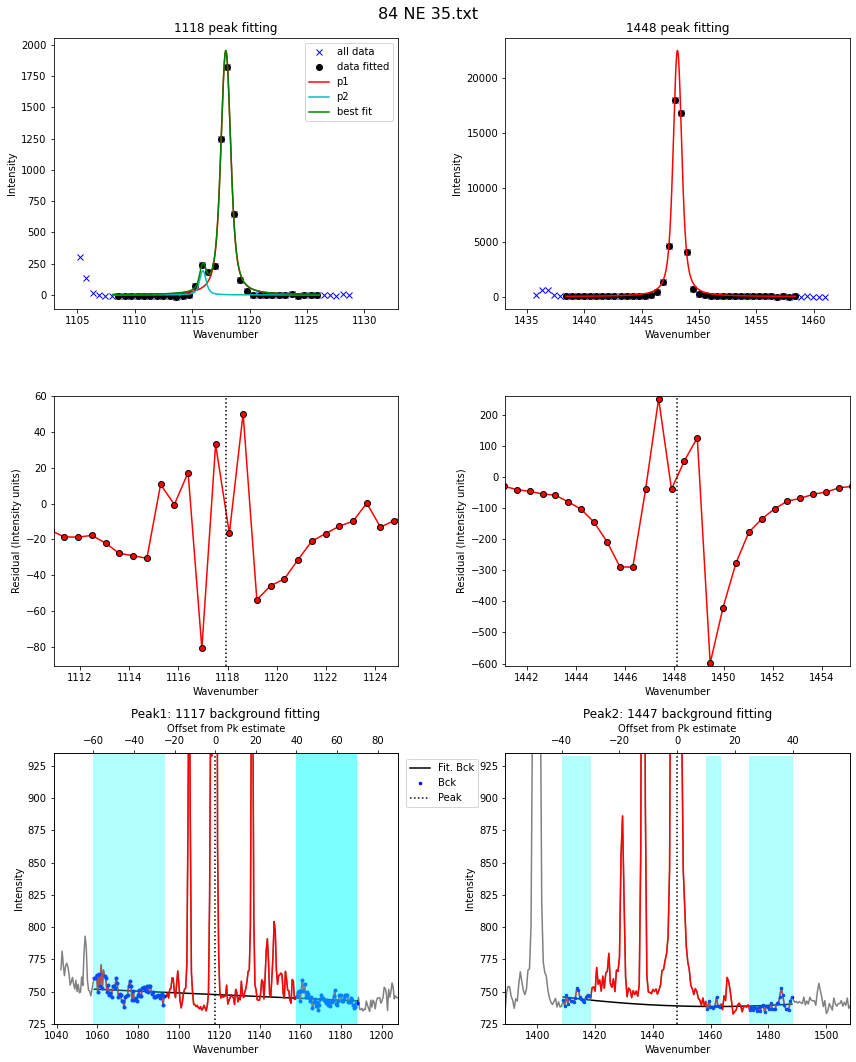

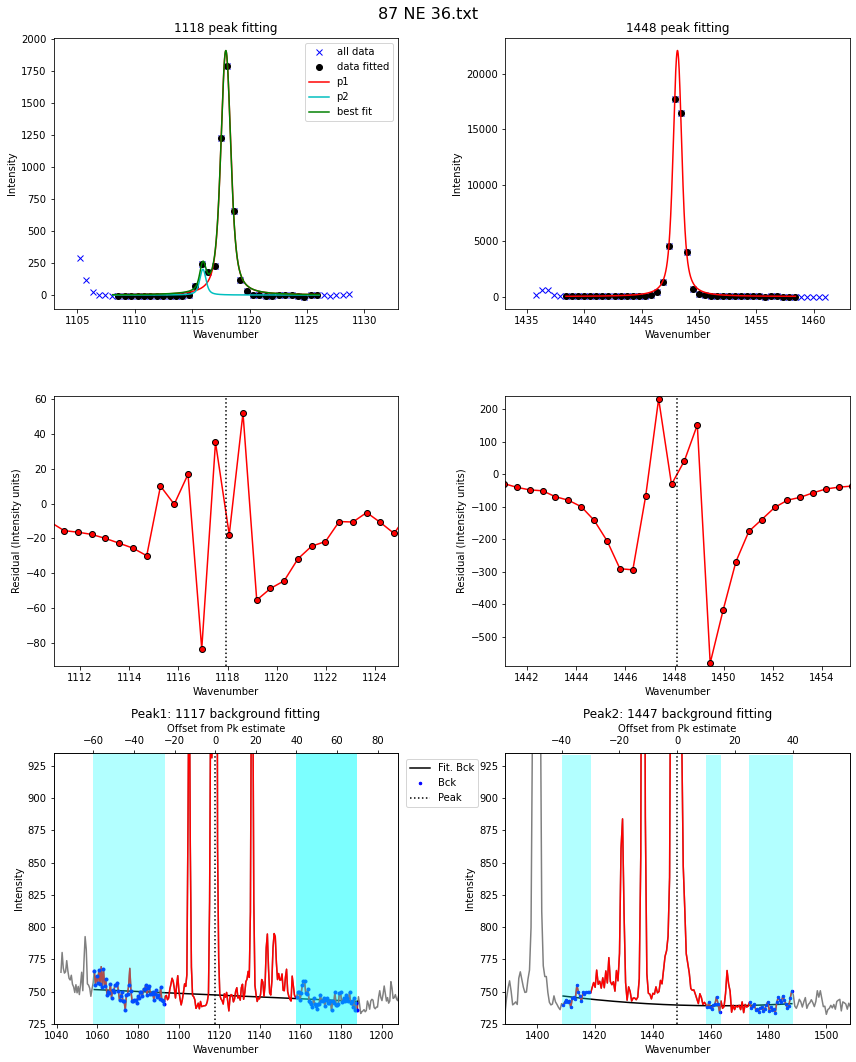

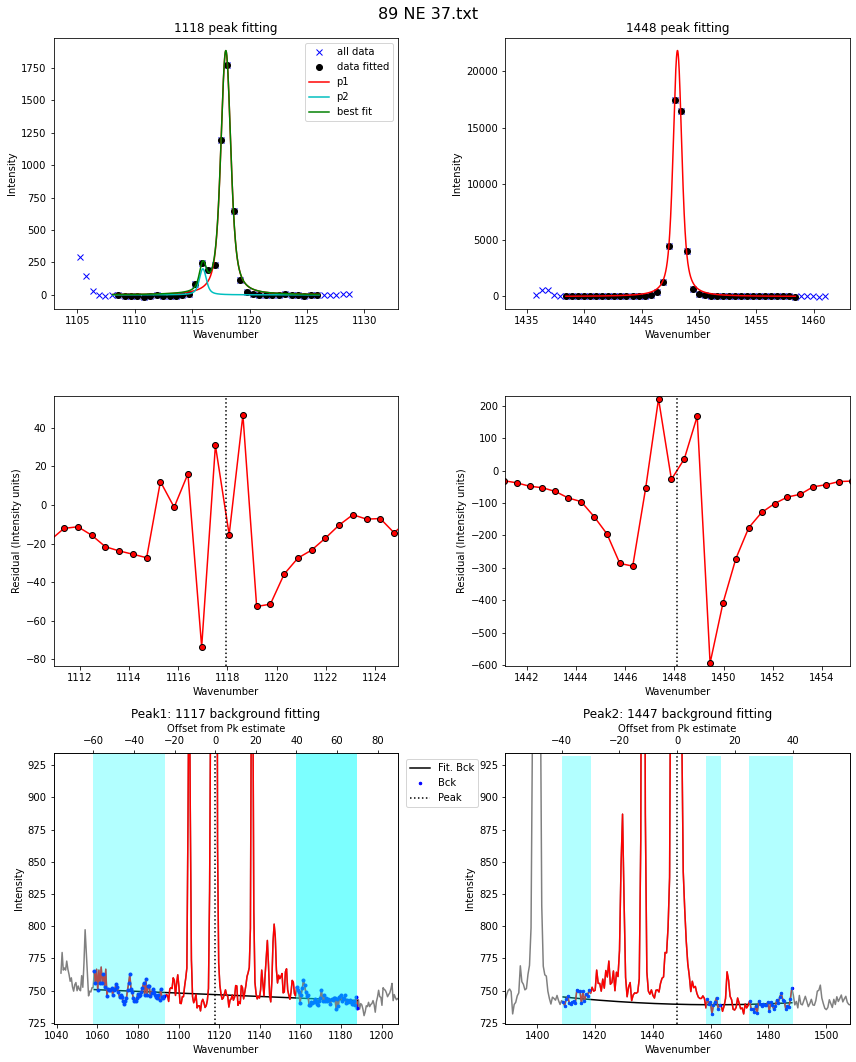

In [56]:
df2=pf.loop_Ne_lines(files=Ne_files, path=spectra_path, filetype=filetype,
                  config=Ne_Config, peaks_1=2, Ne=Ne, Ne_center_1=nearest_pk1,
                  Ne_center_2=nearest_pk2, DeltaNe_ideal=ideal_split['Ne_Split'], 
                  plot_figure=True, save_clipboard=True, single_acq=False)

# If any are weird, can fit again here
- If you refit, you'll have to replace the value in the saved dataframe

In [58]:
# # Which file
# filename2=Ne_files[1]  # Or you could put a string here, like 'NE1.txt' 

# # Tweak fit

# Ne_Config2=pf.Ne_peak_config(amplitude=100, LH_offset_mini=[2, 5], 
# lower_bck_pk1=(-50, -30), upper_bck1_pk1=[7, 13], upper_bck2_pk1=[50, 80],
# lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],
# x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])
# Ne_Config

# # You also need to set whether you want 1 peak or 2 for the LH diad
# peaks_1=2

# df_test=pf.fit_Ne_lines(  
#     config=Ne_Config2, peaks_1=peaks_1,
#     Ne=Ne, filename=filename2, path=spectra_path, prefix=prefix,
#     Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
#     DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
# #config: Ne_peak_config=Ne_peak_config(),

## Stitching meta data with Ne line data

In [59]:
# See what deliminators you have in your metadata file you have just got
print(meta['filename'][0])

NE 1.txt


In [60]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_type='.txt')

file_m

array(['NE 1', 'NE 2', 'NE 3', 'NE 4', 'NE 5', 'NE 6', 'NE 7', 'NE 8',
       'NE 9', 'NE 10', 'NE 11', 'NE 12', 'NE 13', 'NE 14', 'NE 15',
       'NE 16', 'NE 17', 'NE 18', 'NE 19', 'NE 20', 'NE 21', 'NE 22',
       'NE 23', 'NE 24', 'NE 25', 'NE 26', 'NE 27', 'NE 29', 'NE 30',
       'NE 31', 'NE 32', 'NE 33', 'NE 34', 'NE 35', 'NE 37'], dtype=object)

In [61]:
type(file_m)

numpy.ndarray

In [62]:
# See what file names you have for your actual datafiles
print(df2['filename'][0])

01 NE 1.txt


In [63]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(names=df2['filename'],
    prefix=True, str_prefix=' ',
   file_type='.txt')
file_s

array(['NE 1', 'NE 2', 'NE 3', 'NE 4', 'NE 5', 'NE 6', 'NE 7', 'NE 8',
       'NE 9', 'NE 10', 'NE 11', 'NE 12', 'NE 13', 'NE 14', 'NE 15',
       'NE 16', 'NE 17', 'NE 18', 'NE 19', 'NE 20', 'NE 21', 'NE 22',
       'NE 23', 'NE 24', 'NE 25', 'NE 26', 'NE 27', 'NE 28', 'NE 29',
       'NE 30', 'NE 31', 'NE 32', 'NE 33', 'NE 34', 'NE 35', 'NE 36',
       'NE 37'], dtype=object)

## Now combining them

In [64]:
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

## Now lets inspect what our Ne correction factors actually look like

In [65]:
help(pf.plot_Ne_corrections)

Help on function plot_Ne_corrections in module DiadFit.ne_lines:

plot_Ne_corrections(df=None, x_axis=None, x_label='index', marker='o', mec='k', mfc='r')
    ## Plot to help inspect which Ne lines to discard



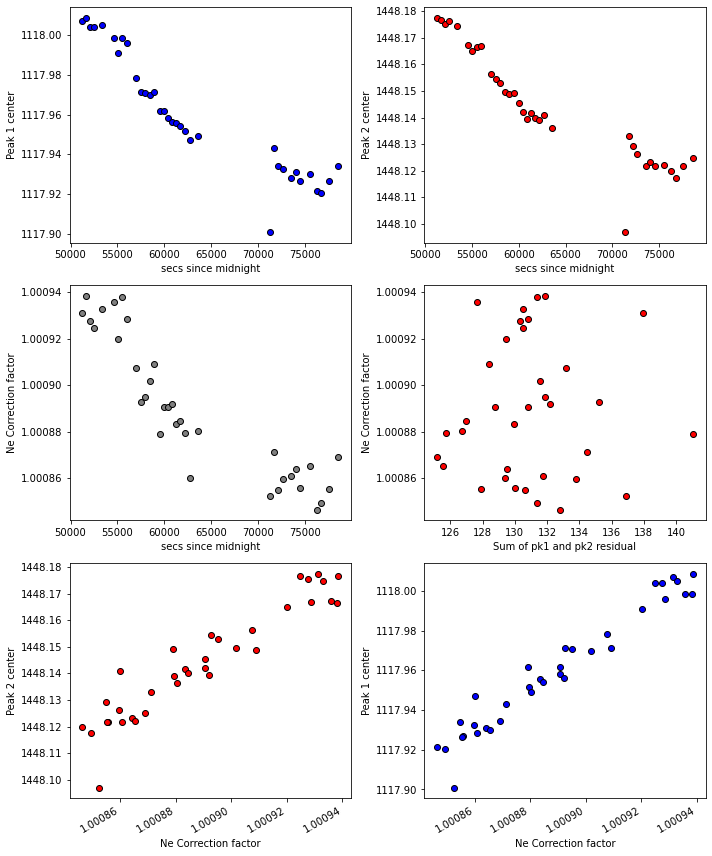

In [66]:
fig=pf.plot_Ne_corrections(df=df_combo, x_axis=df_combo['sec since midnight'],
                      x_label='secs since midnight')

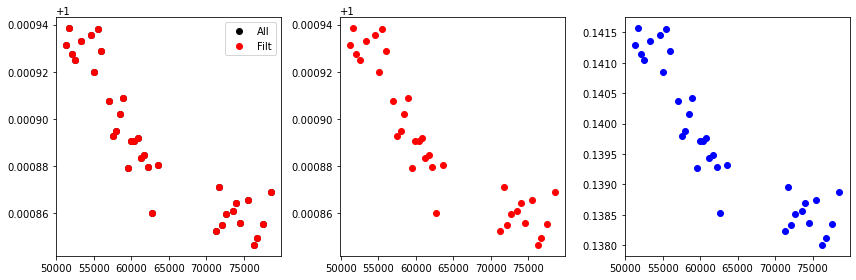

In [69]:
filt=pf.filter_Ne_Line_neighbours(Corr_factor=df_combo['Ne_Corr'], number_av=5, offset=0.0001)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(df_combo['sec since midnight'], df_combo['Ne_Corr'],   'ok', label='All')
ax1.plot(df_combo['sec since midnight'], filt,  'or', label='Filt')
ax1.legend()
ax2.plot(df_combo['sec since midnight'], filt,  'or', label='Filt')

test_split=103
split=filt*test_split
density_test=pf.calculate_density_cornell(temp='SupCrit', Split=split)
ax3.plot(df_combo['sec since midnight'].loc[density_test['Preferred D']>0],
         density_test['Preferred D'].loc[density_test['Preferred D']>0], 'ob')
fig.tight_layout()

In [71]:
df_combo.to_excel('Ne Lines 09.14.22.xlsx')

In [72]:
df_combo

filename_x  pk2_peak_cent  pk2_amplitude  pk2_sigma  pk2_gamma  \
0    01 NE 1.txt    1448.177465   29208.096620   0.238803   0.238803   
1    03 NE 2.txt    1448.176510   27288.779464   0.240282   0.240282   
2    05 NE 3.txt    1448.175332   27492.662337   0.240074   0.240074   
3    07 NE 4.txt    1448.176466   27023.717029   0.242343   0.242343   
4    11 NE 5.txt    1448.174585   27488.667785   0.242671   0.242671   
5    17 NE 6.txt    1448.167242   27089.793919   0.244056   0.244056   
6    19 NE 7.txt    1448.164968   27189.655465   0.245238   0.245238   
7    21 NE 8.txt    1448.166396   27352.390521   0.244923   0.244923   
8    23 NE 9.txt    1448.166916   26986.036442   0.245615   0.245615   
9   27 NE 10.txt    1448.156231   27723.727099   0.246400   0.246400   
10  29 NE 11.txt    1448.154322   28229.410314   0.245781   0.245781   
11  31 NE 12.txt    1448.152904   27415.857048   0.246116   0.246116   
12  33 NE 13.txt    1448.149575   27490.486008   0.246382   0.246382   
13  35 NE 14.txt    1448.148880   26886.375487   0.246469   0.246469   
14  37 NE 15.txt    1448.149128   26838.923773   0.246571   0.246571   
15  39 NE 16.txt    1448.145350   27160.118761   0.247817   0.247817   
16  41 NE 17.txt    1448.141941   27641.733245   0.247429   0.247429   
17  43 NE 18.txt    1448.139510   27409.564487   0.247122   0.247122   
18  45 NE 19.txt    1448.141718   27096.203114   0.247423   0.247423   
19  47 NE 20.txt    1448.139980   27505.111121   0.248534   0.248534   
20  49 NE 21.txt    1448.138975   27067.302182   0.247862   0.247862   
21  51 NE 22.txt    1448.140909   27120.005943   0.249492   0.249492   
22  54 NE 23.txt    1448.136255   27138.323971   0.248685   0.248685   
23  56 NE 24.txt    1448.097050   27845.820676   0.251103   0.251103   
24  58 NE 25.txt    1448.133045   28264.709156   0.248841   0.248841   
25  60 NE 26.txt    1448.129354   27648.917932   0.248291   0.248291   
26  62 NE 27.txt    1448.126308   27660.928712   0.248967   0.248967   
27  66 NE 29.txt    1448.121636   27000.012562   0.249723   0.249723   
28  68 NE 30.txt    1448.123373   27025.507469   0.248632   0.248632   
29  70 NE 31.txt    1448.121765   27059.509661   0.248014   0.248014   
30  75 NE 32.txt    1448.122034   26714.565332   0.247848   0.247848   
31  79 NE 33.txt    1448.119770   27727.179208   0.249715   0.249715   
32  81 NE 34.txt    1448.117448   27583.119777   0.248146   0.248146   
33  84 NE 35.txt    1448.121672   26827.456273   0.248087   0.248087   
34  89 NE 37.txt    1448.124945   26055.554939   0.248960   0.248960   

    error_pk2  pk1_peak_cent  pk1_amplitude  pk1_sigma  pk1_gamma  ...  \
0     0.00346    1118.007308    2542.189366   0.281062   0.281062  ...   
1     0.00352    1118.008732    2661.581692   0.278663   0.278663  ...   
2     0.00349    1118.003936    2520.929955   0.282962   0.282962  ...   
3     0.00359    1118.004181    2537.845157   0.285915   0.285915  ...   
4     0.00357    1118.004953    2525.090538   0.283892   0.283892  ...   
5     0.00349    1117.998576    2582.252679   0.287534   0.287534  ...   
6     0.00349    1117.991129    2521.564150   0.287004   0.287004  ...   
7     0.00356    1117.998501    2570.576023   0.282246   0.282246  ...   
8     0.00359    1117.995882    2593.298849   0.290402   0.290402  ...   
9     0.00358    1117.978210    2514.954312   0.282481   0.282481  ...   
10    0.00348    1117.971422    2527.758144   0.286594   0.286594  ...   
11    0.00348    1117.970805    2583.301950   0.286564   0.286564  ...   
12    0.00348    1117.969722    2639.402548   0.288127   0.288127  ...   
13    0.00350    1117.971369    2526.751759   0.288701   0.288701  ...   
14    0.00344    1117.961789    2556.087816   0.286449   0.286449  ...   
15    0.00345    1117.961757    2423.790480   0.287463   0.287463  ...   
16    0.00347    1117.958360    2645.897549   0.285052   0.285052  ...   
17    0.00345    1117.956424    2632.058263   0.290986   0.290986  ...   
18    0

## Now lets make a regression against time

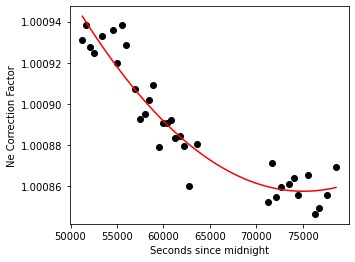

In [77]:
df_combo_filt=df_combo[density_test['Preferred D']>0]
model=pf.reg_Ne_lines_time(df=df_combo_filt, N_poly=2, fit='poly')

## SAving as pickle, can then load as a pickle

In [78]:
import pickle
with open('Ne_Line_Regression_LM0_09.14.22.pck', 'wb') as file_handle:
    pickle.dump(model, file_handle)

In [80]:
with open('Ne_Line_Regression_LM0_09.14.22.pck', 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

## You can then load these pickles into the notebook where you fit your Diad data|